## Project was peer-reviewed and validated by a Data Scientist.
- Data sets for this project is avialable through Kaggle at https://www.kaggle.com/c/house-prices-advanced-regression-techniques
- Business objective of this project is to predict prices of the house.
- Hypothesis - In order to fill the missing values for different features, it would be helpful to look at them in relation to each other.
- The model was an ensemble. Algorithms were stacked by using Stacking regressor with Bagging and Boosting.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Data sets that contain the information are imported for analysis to address the business objective.

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [3]:
pd.set_option('display.max_columns', 81)
pd.set_option('display.max_rows', 50)

# 2. Both training and testing datasets are appended together because there are values that are missing and having both datasets together in one DataFrame would allow to fill the missing values at once and also help to look at the entire dataset which is helpful for analysis.

In [4]:
data_full = data_train.append(data_test, ignore_index = True)

C:\Users\maniq\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [5]:
data_full.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,NaN,0,2,CollgCr,61,5,7,Y,0,NaN,CompShg,Gable,Normal,208500.0,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,TA,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,NaN,0,5,Veenker,0,8,6,Y,0,NaN,CompShg,Gable,Normal,181500.0,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,NaN,0,9,CollgCr,42,5,7,Y,0,NaN,CompShg,Gable,Normal,223500.0,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NaN,Gd,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,NaN,0,2,Crawfor,35,5,7,Y,0,NaN,CompShg,Gable,Abnorml,140000.0,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,NaN,0,12,NoRidge,84,5,8,Y,0,NaN,CompShg,Gable,Normal,250000.0,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


# 3. Fill missing values - In order to fill the missing values, it will be helpful to sort the values from least to most missing values, which will help identify patterns in different features.

In [6]:
data_full.isnull().sum()[data_full.isnull().sum()>0].sort_values(ascending = True)

GarageArea         1
SaleType           1
KitchenQual        1
BsmtFinSF1         1
BsmtFinSF2         1
GarageCars         1
TotalBsmtSF        1
Exterior2nd        1
Exterior1st        1
BsmtUnfSF          1
Electrical         1
Functional         2
Utilities          2
BsmtHalfBath       2
BsmtFullBath       2
MSZoning           4
MasVnrArea        23
MasVnrType        24
BsmtFinType1      79
BsmtFinType2      80
BsmtQual          81
BsmtCond          82
BsmtExposure      82
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCond       159
GarageQual       159
LotFrontage      486
FireplaceQu     1420
SalePrice       1459
Fence           2348
Alley           2721
MiscFeature     2814
PoolQC          2909
dtype: int64

In [7]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

In [8]:
data_full[data_full.GarageArea.isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
2576,942,886,0,NaN,3,1Fam,TA,No,548.0,0.0,ALQ,Unf,0.0,0.0,Gd,311.0,Y,Norm,Norm,SBrkr,212,TA,TA,Wd Sdng,Plywood,MnPrv,NaN,0,BrkTil,2,Typ,NaN,NaN,NaN,NaN,NaN,Detchd,NaN,1828,0,GasA,Ex,2Story,2577,1,Gd,Lvl,Gtl,9060,Inside,50.0,Reg,0,70,RM,0.0,None,NaN,0,3,IDOTRR,0,6,5,Y,0,NaN,CompShg,Gable,Alloca,NaN,WD,0,Pave,6,859.0,AllPub,174,1923,1999,2007


## Garage Area and Garage Cars only have 1 missing value and it’s the same house that is missing these values. It is possible that the Garage Area was left empty because there is no Garage Area, which is also why Garage Cars was left empty. Because if there is no Garage, it cannot be determined how many cars the Garage would have accommodated, so that could have been why the cells were left empty.

In [9]:
data_full.GarageArea.fillna(0, inplace = True)
data_full.GarageCars.fillna(0, inplace = True)

In [10]:
data_full[data_full.SaleType.isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
2489,1176,0,0,NaN,3,1Fam,TA,Mn,190.0,873.0,Rec,BLQ,1.0,0.0,TA,95.0,Y,Feedr,Norm,SBrkr,0,TA,TA,Plywood,Plywood,NaN,Gd,2,CBlock,1,Typ,303.0,1.0,TA,Unf,TA,Attchd,1958.0,1176,0,GasA,TA,1Story,2490,1,TA,Lvl,Gtl,13770,Corner,85.0,Reg,0,20,RL,340.0,BrkFace,NaN,0,10,Sawyer,0,6,5,Y,0,NaN,CompShg,Gable,Normal,NaN,NaN,0,Pave,6,1158.0,AllPub,0,1958,1998,2007


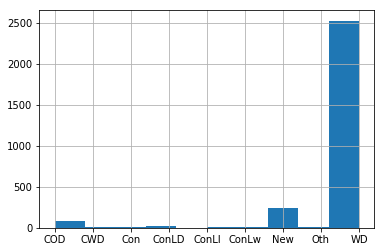

In [11]:
data_full.SaleType.hist()

## WD is the most repeated and occurring value for SaleType, so 1 missing value for it will be filled with 1.

In [12]:
data_full.SaleType.fillna('WD', inplace = True)

In [13]:
data_full[data_full.Exterior1st.isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
2151,1518,0,0,NaN,2,1Fam,TA,Gd,1035.0,0.0,ALQ,Unf,1.0,0.0,TA,545.0,Y,Norm,Norm,SBrkr,0,TA,TA,NaN,NaN,NaN,Gd,2,PConc,1,Typ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1518,0,GasA,Ex,1Story,2152,1,Fa,Lvl,Gtl,19550,Inside,85.0,Reg,0,30,RL,0.0,None,NaN,0,1,Edwards,39,7,5,Y,0,NaN,Tar&Grv,Flat,Normal,NaN,WD,0,Pave,5,1580.0,AllPub,0,1940,2007,2008


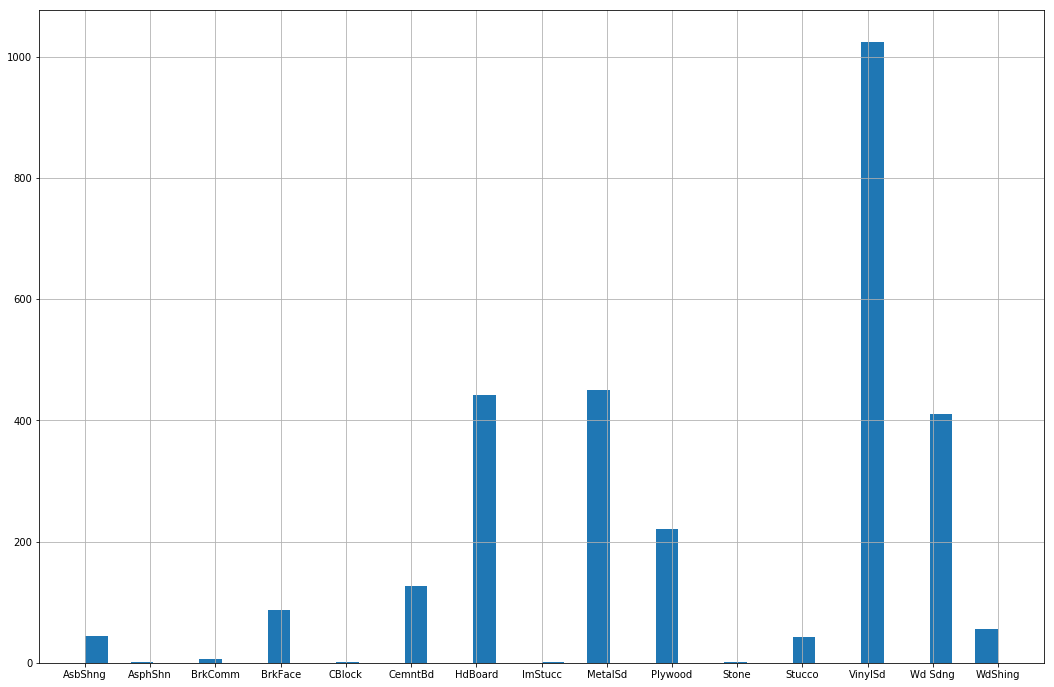

In [14]:
plt.figure(figsize=(18,12))
data_full.Exterior1st.hist(bins = 40)
plt.figure(figsize=(6,4))

## For Exterior 1st, there is 1 missing value and that is filled with VinylSd which is the most repeated value.

In [15]:
data_full.Exterior1st.fillna('VinylSd', inplace = True)

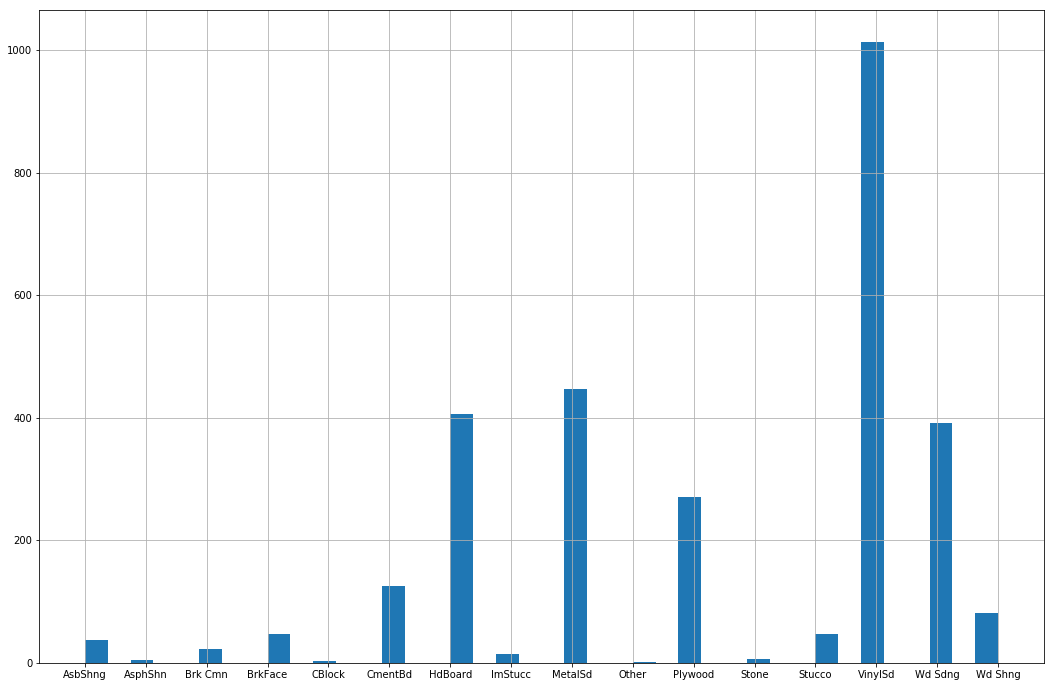

In [16]:
plt.figure(figsize=(18,12))
data_full.Exterior2nd.hist(bins = 40)
plt.figure(figsize=(6,4))

In [17]:
data_full.Exterior2nd.fillna('VinylSd', inplace = True)

## There is 1 value missing for BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, and TotalBsmtSF. And it's the same house that is missing this value. All of these features are about Basement, and if there is no surface area recorded for the basement for this house, it is likely because the house doesn't have a basement, so the empty values for this house will be filled with 0.

In [18]:
data_full[data_full.BsmtFinSF1.isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
2120,896,0,0,NaN,2,1Fam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Feedr,Norm,FuseA,0,TA,TA,MetalSd,CBlock,MnPrv,NaN,0,PConc,1,Typ,280.0,1.0,TA,Unf,TA,Detchd,1946.0,896,0,GasA,TA,1Story,2121,1,TA,Lvl,Gtl,5940,FR3,99.0,IR1,0,20,RM,0.0,None,NaN,0,4,BrkSide,0,7,4,Y,0,NaN,CompShg,Gable,Abnorml,NaN,ConLD,0,Pave,4,NaN,AllPub,0,1946,1950,2008


In [19]:
data_full.BsmtFinSF1.fillna(0, inplace = True)
data_full.BsmtFinSF2.fillna(0, inplace = True)
data_full.BsmtUnfSF.fillna(0, inplace = True)
data_full.TotalBsmtSF.fillna(0, inplace = True)

## There are 2 values missing for basement full bath and basement half bath. One of the houses is the same as the above house which doesn’t have a basement, so missing values for these will also be filled with 0. It's likely that there is no basement full bath and basement half baths because there is no basement.

In [20]:
data_full[data_full.BsmtFullBath.isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
2120,896,0,0,NaN,2,1Fam,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,Y,Feedr,Norm,FuseA,0,TA,TA,MetalSd,CBlock,MnPrv,NaN,0,PConc,1,Typ,280.0,1.0,TA,Unf,TA,Detchd,1946.0,896,0,GasA,TA,1Story,2121,1,TA,Lvl,Gtl,5940,FR3,99.0,IR1,0,20,RM,0.0,None,NaN,0,4,BrkSide,0,7,4,Y,0,NaN,CompShg,Gable,Abnorml,NaN,ConLD,0,Pave,4,0.0,AllPub,0,1946,1950,2008
2188,3820,0,0,NaN,5,1Fam,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,Y,Norm,Norm,SBrkr,0,TA,TA,Plywood,Plywood,NaN,Gd,2,Slab,3,Typ,624.0,2.0,TA,Unf,TA,Attchd,1959.0,3820,1,GasA,TA,1Story,2189,1,Ex,Lvl,Gtl,47007,Inside,123.0,IR1,0,20,RL,0.0,None,NaN,0,7,Edwards,372,7,5,Y,0,NaN,CompShg,Gable,Normal,NaN,WD,0,Pave,11,0.0,AllPub,0,1959,1996,2008


In [21]:
data_full.BsmtFullBath.fillna(0, inplace = True)
data_full.BsmtHalfBath.fillna(0, inplace = True)

In [22]:
data_full[data_full.Electrical.isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1379,754,640,0,NaN,3,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,Gd,384.0,Y,Norm,Norm,NaN,0,TA,TA,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,400.0,2.0,TA,Fin,TA,BuiltIn,2007.0,1394,1,GasA,Gd,SLvl,1380,1,Gd,Lvl,Gtl,9735,Inside,73.0,Reg,0,80,RL,0.0,None,NaN,0,5,Timber,0,5,5,Y,0,NaN,CompShg,Gable,Normal,167500.0,WD,0,Pave,7,384.0,AllPub,100,2006,2007,2008


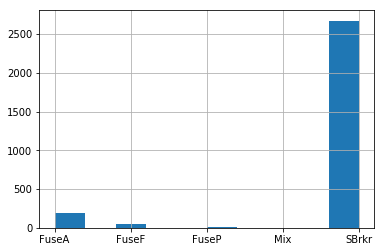

In [23]:
data_full.Electrical.hist()

## There is 1 value missing for Electrical and it is filled with SBrkr because that is the most repeated value for Electrical.

In [24]:
data_full.Electrical.fillna('SBrkr', inplace = True)

In [25]:
data_full[data_full.KitchenQual.isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1555,725,499,0,NaN,3,1Fam,Fa,No,0.0,0.0,Unf,Unf,0.0,0.0,Gd,689.0,N,Norm,Norm,SBrkr,248,TA,TA,Wd Sdng,Wd Sdng,NaN,NaN,0,BrkTil,1,Mod,180.0,1.0,Fa,Unf,Fa,Detchd,1917.0,1224,1,GasA,Gd,1.5Fin,1556,1,NaN,Lvl,Gtl,10632,Inside,72.0,IR1,0,50,RL,0.0,None,NaN,0,1,ClearCr,0,3,5,N,0,NaN,CompShg,Gable,Normal,NaN,COD,0,Pave,6,689.0,AllPub,0,1917,1950,2010


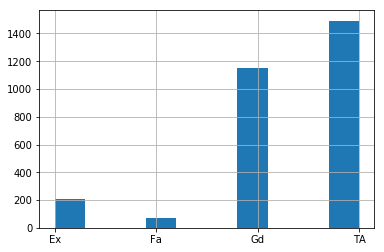

In [26]:
data_full.KitchenQual.hist()

## 1 missing value for Kitch Quality is filled with "TA" because that is the most repeated value for Kitchen Quality as shown in the above histogram.

In [27]:
data_full.KitchenQual.fillna('TA', inplace = True)

In [28]:
data_full[data_full.Utilities.isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1915,810,0,0,NaN,1,1Fam,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,N,Norm,Norm,FuseA,0,Fa,Fa,Wd Sdng,Wd Sdng,NaN,NaN,0,CBlock,1,Min1,280.0,1.0,TA,Unf,TA,Detchd,1975.0,810,0,GasA,TA,1Story,1916,1,TA,Lvl,Gtl,21780,Inside,109.0,Reg,0,30,NaN,0.0,None,NaN,0,3,IDOTRR,24,4,2,N,0,NaN,CompShg,Gable,Normal,NaN,ConLD,0,Grvl,4,0.0,NaN,119,1910,1950,2009
1945,1474,0,0,NaN,3,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,1632.0,Y,Feedr,Norm,FuseA,144,TA,TA,BrkFace,BrkFace,NaN,Gd,2,CBlock,1,Min2,495.0,2.0,TA,Unf,TA,Attchd,1952.0,1474,0,GasA,TA,1Story,1946,1,TA,Bnk,Gtl,31220,FR2,NaN,IR1,0,20,RL,0.0,None,Shed,750,5,Gilbert,0,2,6,Y,0,NaN,CompShg,Hip,Normal,NaN,WD,0,Pave,7,1632.0,NaN,0,1952,1952,2008


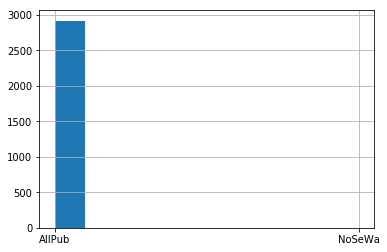

In [29]:
data_full.Utilities.hist()

## 2 missing values for Utilities are filled with AllPub because that’s the mode.

In [30]:
data_full.Utilities.fillna('AllPub', inplace = True)

In [31]:
data_full[data_full.Functional.isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
2216,733,0,0,NaN,2,1Fam,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,N,Norm,Norm,FuseA,0,Po,Fa,AsbShng,VinylSd,NaN,NaN,0,Slab,1,NaN,487.0,2.0,Po,Unf,Fa,Attchd,1952.0,733,0,Wall,Po,1Story,2217,1,Fa,Low,Mod,14584,Inside,80.0,Reg,0,20,NaN,0.0,None,NaN,0,2,IDOTRR,0,5,1,N,0,NaN,CompShg,Gable,Abnorml,NaN,WD,0,Pave,4,0.0,AllPub,0,1952,1952,2008
2473,866,504,0,Grvl,3,1Fam,Fa,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,771.0,Y,Artery,Norm,SBrkr,0,Fa,Fa,Wd Sdng,Wd Sdng,NaN,NaN,0,CBlock,2,NaN,264.0,1.0,Fa,Unf,TA,Detchd,1910.0,1484,0,GasA,Fa,1.5Fin,2474,1,TA,Lvl,Gtl,10320,Corner,60.0,Reg,114,50,RM,0.0,None,NaN,0,9,IDOTRR,211,1,4,N,0,NaN,CompShg,Gable,Abnorml,NaN,COD,84,Pave,6,771.0,AllPub,14,1910,1950,2007


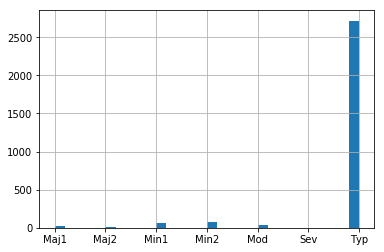

In [32]:
data_full.Functional.hist(bins = 30)

In [33]:
data_full[data_full.Functional == 'Sev']

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
666,1465,915,0,NaN,3,1Fam,TA,No,187.0,723.0,LwQ,Rec,0.0,0.0,Gd,111.0,Y,Norm,Norm,SBrkr,0,Gd,TA,Plywood,Plywood,NaN,Po,1,CBlock,2,Sev,596.0,2.0,TA,Unf,TA,CarPort,1965.0,2380,1,GasA,TA,2Story,667,1,TA,Lvl,Gtl,18450,Inside,NaN,IR1,0,60,RL,113.0,BrkCmn,NaN,0,8,NAmes,265,5,6,Y,0,NaN,Tar&Grv,Flat,Abnorml,129000.0,WD,0,Pave,7,1021.0,AllPub,0,1965,1979,2007
1831,1088,1040,0,Grvl,4,Duplex,Fa,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,1040.0,N,Norm,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,NaN,0,BrkTil,2,Sev,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2128,0,GasA,TA,2Story,1832,2,TA,Bnk,Gtl,3000,Inside,50.0,Reg,0,90,RM,0.0,None,NaN,0,9,OldTown,56,1,5,Y,0,NaN,CompShg,Hip,Abnorml,NaN,WD,0,Pave,11,1040.0,AllPub,0,1922,1950,2009


## 2 missing value for Functional are filled with Typ because that's the mode.

In [34]:
data_full.Functional.fillna('Typ', inplace = True)

In [35]:
data_full[data_full.MSZoning.isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1915,810,0,0,NaN,1,1Fam,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,N,Norm,Norm,FuseA,0,Fa,Fa,Wd Sdng,Wd Sdng,NaN,NaN,0,CBlock,1,Min1,280.0,1.0,TA,Unf,TA,Detchd,1975.0,810,0,GasA,TA,1Story,1916,1,TA,Lvl,Gtl,21780,Inside,109.0,Reg,0,30,NaN,0.0,None,NaN,0,3,IDOTRR,24,4,2,N,0,NaN,CompShg,Gable,Normal,NaN,ConLD,0,Grvl,4,0.0,AllPub,119,1910,1950,2009
2216,733,0,0,NaN,2,1Fam,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,N,Norm,Norm,FuseA,0,Po,Fa,AsbShng,VinylSd,NaN,NaN,0,Slab,1,Typ,487.0,2.0,Po,Unf,Fa,Attchd,1952.0,733,0,Wall,Po,1Story,2217,1,Fa,Low,Mod,14584,Inside,80.0,Reg,0,20,NaN,0.0,None,NaN,0,2,IDOTRR,0,5,1,N,0,NaN,CompShg,Gable,Abnorml,NaN,WD,0,Pave,4,0.0,AllPub,0,1952,1952,2008
2250,1150,686,0,NaN,4,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,686.0,Y,Norm,Norm,SBrkr,0,TA,TA,Wd Sdng,Wd Sdng,NaN,NaN,0,BrkTil,2,Maj1,288.0,1.0,Fa,Unf,TA,Detchd,1900.0,1836,0,GasA,Ex,2.5Unf,2251,1,TA,Low,Gtl,56600,Inside,NaN,IR1,0,70,NaN,0.0,None,NaN,0,1,IDOTRR,0,1,5,N,0,NaN,CompShg,Hip,Normal,NaN,WD,0,Pave,7,686.0,AllPub,0,1900,1950,2008
2904,1600,0,0,NaN,3,1Fam,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,Y,Artery,Norm,FuseA,135,Fa,TA,CBlock,VinylSd,NaN,NaN,0,CBlock,1,Mod,270.0,1.0,TA,Unf,Fa,Attchd,1951.0,1600,1,GasA,TA,1Story,2905,1,TA,Lvl,Gtl,31250,Inside,125.0,Reg,0,20,NaN,0.0,None,NaN,0,5,Mitchel,0,3,1,N,0,NaN,CompShg,Gable,Normal,NaN,WD,0,Pave,6,0.0,AllPub,0,1951,1951,2006


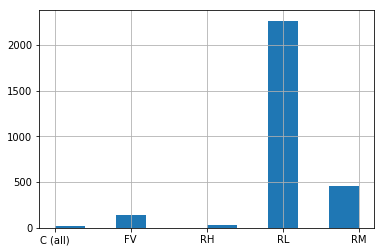

In [36]:
data_full.MSZoning.hist()

# There are 4 missing values for Mszoning that are filled with RL because that's the mode.

In [37]:
data_full.MSZoning.fillna('RL', inplace = True)

In [38]:
data_full[data_full.MasVnrArea.isnull()].head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
234,860,1100,0,NaN,4,1Fam,TA,No,625.0,0.0,GLQ,Unf,1.0,0.0,Gd,235.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,2,PConc,2,Typ,440.0,2.0,TA,Fin,TA,BuiltIn,2002.0,1960,1,GasA,Ex,2Story,235,1,Gd,Lvl,Gtl,7851,Inside,NaN,Reg,0,60,RL,NaN,NaN,NaN,0,5,Gilbert,48,5,6,Y,0,NaN,CompShg,Gable,Normal,216500.0,WD,0,Pave,8,860.0,AllPub,288,2002,2002,2010
529,2515,0,0,NaN,4,1Fam,TA,No,1219.0,0.0,Rec,Unf,1.0,0.0,TA,816.0,Y,Norm,Norm,SBrkr,200,TA,Gd,Wd Sdng,Stone,NaN,TA,2,PConc,3,Maj1,484.0,2.0,TA,RFn,TA,Attchd,1975.0,2515,0,GasA,TA,1Story,530,2,TA,Lvl,Gtl,32668,CulDSac,NaN,IR1,0,20,RL,NaN,NaN,NaN,0,3,Crawfor,0,3,6,Y,0,NaN,CompShg,Hip,Alloca,200624.0,WD,0,Pave,9,2035.0,AllPub,0,1957,1975,2007
650,822,843,0,NaN,3,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,Gd,813.0,Y,Norm,Norm,SBrkr,0,TA,Gd,CemntBd,CmentBd,NaN,NaN,0,PConc,2,Typ,562.0,2.0,TA,RFn,TA,Attchd,2007.0,1665,1,GasA,Ex,2Story,651,1,Gd,Lvl,Gtl,8125,Inside,65.0,Reg,0,60,FV,NaN,NaN,NaN,0,5,Somerst,0,6,7,Y,0,NaN,CompShg,Gable,Normal,205950.0,WD,0,Pave,7,813.0,AllPub,0,2007,2007,2008
936,1200,0,0,NaN,2,1Fam,TA,No,833.0,0.0,GLQ,Unf,1.0,0.0,Gd,343.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,555.0,2.0,TA,RFn,TA,Attchd,2003.0,1200,0,GasA,Ex,1Story,937,1,Gd,Lvl,Gtl,10083,Inside,67.0,Reg,0,20,RL,NaN,NaN,NaN,0,8,SawyerW,41,5,7,Y,0,NaN,CompShg,Gable,Normal,184900.0,WD,0,Pave,5,1176.0,AllPub,0,2003,2003,2009
973,1428,0,0,NaN,3,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,Gd,1428.0,Y,Norm,Norm,SBrkr,0,TA,Gd,CemntBd,CmentBd,NaN,NaN,0,PConc,2,Typ,480.0,2.0,TA,Fin,TA,Attchd,2007.0,1428,0,GasA,Ex,1Story,974,1,Gd,Lvl,Gtl,11639,Corner,95.0,Reg,0,20,FV,NaN,NaN,NaN,0,12,Somerst,120,5,7,Y,0,NaN,CompShg,Gable,Partial,182000.0,New,0,Pave,6,1428.0,AllPub,0,2007,2008,2008


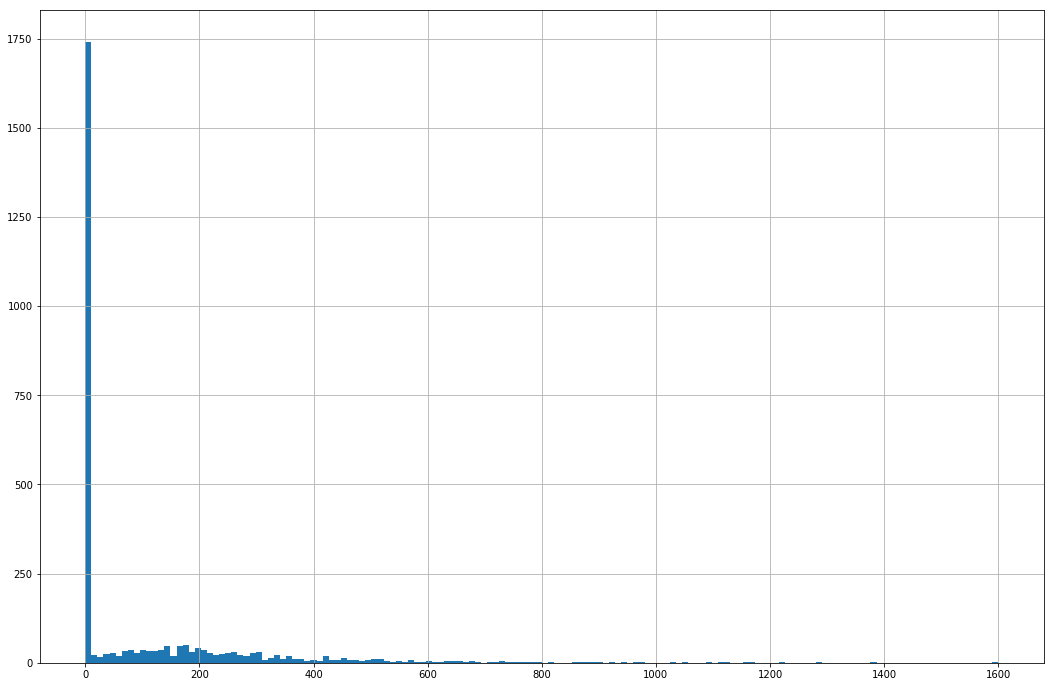

In [39]:
plt.figure(figsize=(18,12))
data_full.MasVnrArea.hist(bins = 150)
plt.figure(figsize=(6,4))

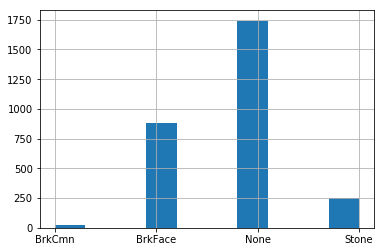

In [40]:
data_full.MasVnrType.hist()

## There are 23 missing value for MasVnrArea that are filled with 0. It is likely that these were left empty because there is no Masonry Veneer Area for these houses. There are 24 missing values for MasVnrType which are filled with None because these don’t have VasVnrArea.

In [41]:
data_full.MasVnrArea.fillna(0, inplace = True)
data_full.MasVnrType.fillna('None', inplace = True)

In [42]:
data_full[data_full.BsmtFinType2.isnull()].head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
17,1296,0,0,NaN,2,Duplex,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,Y,Norm,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,NaN,0,Slab,2,Typ,516.0,2.0,TA,Unf,TA,CarPort,1967.0,1296,0,GasA,TA,1Story,18,2,TA,Lvl,Gtl,10791,Inside,72.0,Reg,0,90,RL,0.0,None,Shed,500,10,Sawyer,0,5,4,Y,0,NaN,CompShg,Gable,Normal,90000.0,WD,0,Pave,6,0.0,AllPub,0,1967,1967,2006
39,1152,0,0,NaN,2,Duplex,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,N,Norm,Norm,FuseP,0,TA,TA,AsbShng,Plywood,NaN,NaN,0,PConc,2,Typ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1152,0,GasA,TA,1Story,40,2,Fa,Lvl,Gtl,6040,Inside,65.0,Reg,0,90,RL,0.0,None,NaN,0,6,Edwards,0,5,4,N,0,NaN,CompShg,Gable,AdjLand,82000.0,WD,0,Pave,6,0.0,AllPub,0,1955,1955,2008
90,1040,0,0,NaN,2,1Fam,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,Y,Norm,Norm,FuseA,0,TA,TA,BrkFace,Wd Sdng,NaN,NaN,0,Slab,1,Typ,420.0,2.0,TA,Unf,TA,Detchd,1950.0,1040,0,GasA,TA,1Story,91,1,TA,Lvl,Gtl,7200,Inside,60.0,Reg,0,20,RL,0.0,None,NaN,0,7,NAmes,29,5,4,Y,0,NaN,CompShg,Gable,Normal,109900.0,WD,0,Pave,4,0.0,AllPub,0,1950,1950,2006
102,1535,0,0,NaN,4,Duplex,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,Y,Norm,Norm,SBrkr,0,Fa,TA,HdBoard,HdBoard,NaN,NaN,0,Slab,2,Typ,410.0,2.0,TA,Unf,TA,Attchd,1979.0,1535,0,GasA,TA,1Story,103,2,TA,Bnk,Gtl,7018,Inside,64.0,Reg,0,90,RL,0.0,None,NaN,0,6,SawyerW,0,5,5,Y,0,NaN,CompShg,Gable,Alloca,118964.0,WD,0,Pave,8,0.0,AllPub,0,1979,1979,2009
156,1040,0,0,NaN,2,1Fam,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,Y,Norm,Norm,FuseF,0,TA,TA,Wd Sdng,Wd Sdng,NaN,NaN,0,CBlock,1,Typ,625.0,2.0,TA,Unf,TA,Detchd,1950.0,1040,0,GasA,TA,1Story,157,1,TA,Lvl,Gtl,7200,Inside,60.0,Reg,0,20,RL,0.0,None,NaN,0,6,NAmes,0,7,5,Y,0,NaN,CompShg,Hip,Normal,109500.0,WD,0,Pave,5,0.0,AllPub,0,1950,1950,2006


In [43]:
data_full.BsmtFinType2.loc[332] = 'Unf'

C:\Users\maniq\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [44]:
data_full[data_full.BsmtFinType1.isnull()].head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
17,1296,0,0,NaN,2,Duplex,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,Y,Norm,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,NaN,0,Slab,2,Typ,516.0,2.0,TA,Unf,TA,CarPort,1967.0,1296,0,GasA,TA,1Story,18,2,TA,Lvl,Gtl,10791,Inside,72.0,Reg,0,90,RL,0.0,None,Shed,500,10,Sawyer,0,5,4,Y,0,NaN,CompShg,Gable,Normal,90000.0,WD,0,Pave,6,0.0,AllPub,0,1967,1967,2006
39,1152,0,0,NaN,2,Duplex,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,N,Norm,Norm,FuseP,0,TA,TA,AsbShng,Plywood,NaN,NaN,0,PConc,2,Typ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1152,0,GasA,TA,1Story,40,2,Fa,Lvl,Gtl,6040,Inside,65.0,Reg,0,90,RL,0.0,None,NaN,0,6,Edwards,0,5,4,N,0,NaN,CompShg,Gable,AdjLand,82000.0,WD,0,Pave,6,0.0,AllPub,0,1955,1955,2008
90,1040,0,0,NaN,2,1Fam,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,Y,Norm,Norm,FuseA,0,TA,TA,BrkFace,Wd Sdng,NaN,NaN,0,Slab,1,Typ,420.0,2.0,TA,Unf,TA,Detchd,1950.0,1040,0,GasA,TA,1Story,91,1,TA,Lvl,Gtl,7200,Inside,60.0,Reg,0,20,RL,0.0,None,NaN,0,7,NAmes,29,5,4,Y,0,NaN,CompShg,Gable,Normal,109900.0,WD,0,Pave,4,0.0,AllPub,0,1950,1950,2006
102,1535,0,0,NaN,4,Duplex,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,Y,Norm,Norm,SBrkr,0,Fa,TA,HdBoard,HdBoard,NaN,NaN,0,Slab,2,Typ,410.0,2.0,TA,Unf,TA,Attchd,1979.0,1535,0,GasA,TA,1Story,103,2,TA,Bnk,Gtl,7018,Inside,64.0,Reg,0,90,RL,0.0,None,NaN,0,6,SawyerW,0,5,5,Y,0,NaN,CompShg,Gable,Alloca,118964.0,WD,0,Pave,8,0.0,AllPub,0,1979,1979,2009
156,1040,0,0,NaN,2,1Fam,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,Y,Norm,Norm,FuseF,0,TA,TA,Wd Sdng,Wd Sdng,NaN,NaN,0,CBlock,1,Typ,625.0,2.0,TA,Unf,TA,Detchd,1950.0,1040,0,GasA,TA,1Story,157,1,TA,Lvl,Gtl,7200,Inside,60.0,Reg,0,20,RL,0.0,None,NaN,0,6,NAmes,0,7,5,Y,0,NaN,CompShg,Hip,Normal,109500.0,WD,0,Pave,5,0.0,AllPub,0,1950,1950,2006


## There are 79 missing values for Basement Finish type 1, and 80 missing values for Basement Finish type 2 with N/A because Basement finish 1 and 2 are 0 square feet, which means there are no Basements, so these missing values will be filled with "NA".

In [45]:
data_full.BsmtFinType1.fillna('NA', inplace = True)
data_full.BsmtFinType2.fillna('NA', inplace = True)

In [46]:
data_full[data_full.BsmtExposure.isnull()].head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
17,1296,0,0,NaN,2,Duplex,NaN,NaN,0.0,0.0,NA,NA,0.0,0.0,NaN,0.0,Y,Norm,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,NaN,0,Slab,2,Typ,516.0,2.0,TA,Unf,TA,CarPort,1967.0,1296,0,GasA,TA,1Story,18,2,TA,Lvl,Gtl,10791,Inside,72.0,Reg,0,90,RL,0.0,None,Shed,500,10,Sawyer,0,5,4,Y,0,NaN,CompShg,Gable,Normal,90000.0,WD,0,Pave,6,0.0,AllPub,0,1967,1967,2006
39,1152,0,0,NaN,2,Duplex,NaN,NaN,0.0,0.0,NA,NA,0.0,0.0,NaN,0.0,N,Norm,Norm,FuseP,0,TA,TA,AsbShng,Plywood,NaN,NaN,0,PConc,2,Typ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1152,0,GasA,TA,1Story,40,2,Fa,Lvl,Gtl,6040,Inside,65.0,Reg,0,90,RL,0.0,None,NaN,0,6,Edwards,0,5,4,N,0,NaN,CompShg,Gable,AdjLand,82000.0,WD,0,Pave,6,0.0,AllPub,0,1955,1955,2008
90,1040,0,0,NaN,2,1Fam,NaN,NaN,0.0,0.0,NA,NA,0.0,0.0,NaN,0.0,Y,Norm,Norm,FuseA,0,TA,TA,BrkFace,Wd Sdng,NaN,NaN,0,Slab,1,Typ,420.0,2.0,TA,Unf,TA,Detchd,1950.0,1040,0,GasA,TA,1Story,91,1,TA,Lvl,Gtl,7200,Inside,60.0,Reg,0,20,RL,0.0,None,NaN,0,7,NAmes,29,5,4,Y,0,NaN,CompShg,Gable,Normal,109900.0,WD,0,Pave,4,0.0,AllPub,0,1950,1950,2006
102,1535,0,0,NaN,4,Duplex,NaN,NaN,0.0,0.0,NA,NA,0.0,0.0,NaN,0.0,Y,Norm,Norm,SBrkr,0,Fa,TA,HdBoard,HdBoard,NaN,NaN,0,Slab,2,Typ,410.0,2.0,TA,Unf,TA,Attchd,1979.0,1535,0,GasA,TA,1Story,103,2,TA,Bnk,Gtl,7018,Inside,64.0,Reg,0,90,RL,0.0,None,NaN,0,6,SawyerW,0,5,5,Y,0,NaN,CompShg,Gable,Alloca,118964.0,WD,0,Pave,8,0.0,AllPub,0,1979,1979,2009
156,1040,0,0,NaN,2,1Fam,NaN,NaN,0.0,0.0,NA,NA,0.0,0.0,NaN,0.0,Y,Norm,Norm,FuseF,0,TA,TA,Wd Sdng,Wd Sdng,NaN,NaN,0,CBlock,1,Typ,625.0,2.0,TA,Unf,TA,Detchd,1950.0,1040,0,GasA,TA,1Story,157,1,TA,Lvl,Gtl,7200,Inside,60.0,Reg,0,20,RL,0.0,None,NaN,0,6,NAmes,0,7,5,Y,0,NaN,CompShg,Hip,Normal,109500.0,WD,0,Pave,5,0.0,AllPub,0,1950,1950,2006


In [47]:
data_full.BsmtExposure[[948, 1487, 2348]] = 'NA'

C:\Users\maniq\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
data_full[data_full.BsmtCond.isnull()].head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
17,1296,0,0,NaN,2,Duplex,NaN,NaN,0.0,0.0,NA,NA,0.0,0.0,NaN,0.0,Y,Norm,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,NaN,0,Slab,2,Typ,516.0,2.0,TA,Unf,TA,CarPort,1967.0,1296,0,GasA,TA,1Story,18,2,TA,Lvl,Gtl,10791,Inside,72.0,Reg,0,90,RL,0.0,None,Shed,500,10,Sawyer,0,5,4,Y,0,NaN,CompShg,Gable,Normal,90000.0,WD,0,Pave,6,0.0,AllPub,0,1967,1967,2006
39,1152,0,0,NaN,2,Duplex,NaN,NaN,0.0,0.0,NA,NA,0.0,0.0,NaN,0.0,N,Norm,Norm,FuseP,0,TA,TA,AsbShng,Plywood,NaN,NaN,0,PConc,2,Typ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1152,0,GasA,TA,1Story,40,2,Fa,Lvl,Gtl,6040,Inside,65.0,Reg,0,90,RL,0.0,None,NaN,0,6,Edwards,0,5,4,N,0,NaN,CompShg,Gable,AdjLand,82000.0,WD,0,Pave,6,0.0,AllPub,0,1955,1955,2008
90,1040,0,0,NaN,2,1Fam,NaN,NaN,0.0,0.0,NA,NA,0.0,0.0,NaN,0.0,Y,Norm,Norm,FuseA,0,TA,TA,BrkFace,Wd Sdng,NaN,NaN,0,Slab,1,Typ,420.0,2.0,TA,Unf,TA,Detchd,1950.0,1040,0,GasA,TA,1Story,91,1,TA,Lvl,Gtl,7200,Inside,60.0,Reg,0,20,RL,0.0,None,NaN,0,7,NAmes,29,5,4,Y,0,NaN,CompShg,Gable,Normal,109900.0,WD,0,Pave,4,0.0,AllPub,0,1950,1950,2006
102,1535,0,0,NaN,4,Duplex,NaN,NaN,0.0,0.0,NA,NA,0.0,0.0,NaN,0.0,Y,Norm,Norm,SBrkr,0,Fa,TA,HdBoard,HdBoard,NaN,NaN,0,Slab,2,Typ,410.0,2.0,TA,Unf,TA,Attchd,1979.0,1535,0,GasA,TA,1Story,103,2,TA,Bnk,Gtl,7018,Inside,64.0,Reg,0,90,RL,0.0,None,NaN,0,6,SawyerW,0,5,5,Y,0,NaN,CompShg,Gable,Alloca,118964.0,WD,0,Pave,8,0.0,AllPub,0,1979,1979,2009
156,1040,0,0,NaN,2,1Fam,NaN,NaN,0.0,0.0,NA,NA,0.0,0.0,NaN,0.0,Y,Norm,Norm,FuseF,0,TA,TA,Wd Sdng,Wd Sdng,NaN,NaN,0,CBlock,1,Typ,625.0,2.0,TA,Unf,TA,Detchd,1950.0,1040,0,GasA,TA,1Story,157,1,TA,Lvl,Gtl,7200,Inside,60.0,Reg,0,20,RL,0.0,None,NaN,0,6,NAmes,0,7,5,Y,0,NaN,CompShg,Hip,Normal,109500.0,WD,0,Pave,5,0.0,AllPub,0,1950,1950,2006


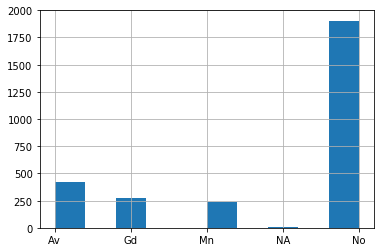

In [49]:
data_full.BsmtExposure.hist()

## There are 81 values missing for Basement Quality, 82 values are missing for Basement condition, and 82 values are missing for Basement Exposure. These values are also missing because when ratings were being given for quality and condition, no rating could be given to these houses because these houses don’t have a basement, so these missing values with be filled with “NA”.

In [50]:
data_full.BsmtQual.fillna('NA', inplace = True)
data_full.BsmtCond.fillna('NA', inplace = True)
data_full.BsmtExposure.fillna('NA', inplace = True)

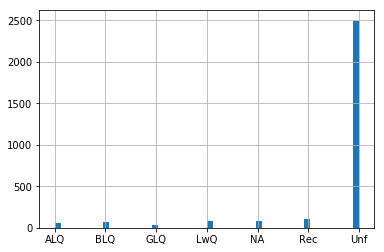

In [51]:
data_full.BsmtFinType2.hist(bins = 50)

## Just like there are houses that don't have basements and had values missing, in a similar manner there are houses that don't have Garage. There are 159 houses that are missing values for Garage Condition, Garage Finish, Garage Quality, and Garage Year built. 157 houses are also missing values for Garage Type. All of these missing values are about Garage and they are all missing the same number of values for the same houses. Missing values for these will be filled with "NA" for object feature and 0 for integer feature.

In [52]:
data_full.GarageCond.fillna('NA', inplace = True)
data_full.GarageFinish.fillna('NA', inplace = True)
data_full.GarageQual.fillna('NA', inplace = True)
data_full.GarageType.fillna('NA', inplace = True)
data_full.GarageYrBlt.fillna(0, inplace = True)

In [53]:
data_full[data_full.GarageYrBlt.isnull()].head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold


In [54]:
data_full.loc[[2126, 2576]]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
2126,1242,742,0,Grvl,5,2fmCon,TA,Mn,196.0,0.0,Rec,Unf,0.0,0.0,TA,1046.0,Y,Norm,Norm,SBrkr,180,TA,TA,Wd Sdng,Wd Sdng,MnPrv,NaN,0,PConc,2,Typ,360.0,1.0,NA,NA,NA,Detchd,0.0,1984,0,GasA,Gd,2.5Unf,2127,1,TA,Lvl,Gtl,8094,Inside,57.0,Reg,0,60,RM,0.0,None,Shed,1000,9,OldTown,0,8,6,Y,0,NaN,CompShg,Gable,Normal,NaN,WD,0,Pave,8,1242.0,AllPub,64,1910,1983,2008
2576,942,886,0,NaN,3,1Fam,TA,No,548.0,0.0,ALQ,Unf,0.0,0.0,Gd,311.0,Y,Norm,Norm,SBrkr,212,TA,TA,Wd Sdng,Plywood,MnPrv,NaN,0,BrkTil,2,Typ,0.0,0.0,NA,NA,NA,Detchd,0.0,1828,0,GasA,Ex,2Story,2577,1,Gd,Lvl,Gtl,9060,Inside,50.0,Reg,0,70,RM,0.0,None,NaN,0,3,IDOTRR,0,6,5,Y,0,NaN,CompShg,Gable,Alloca,NaN,WD,0,Pave,6,859.0,AllPub,174,1923,1999,2007


In [55]:
data_full['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'NA', 'Basment',
       '2Types'], dtype=object)

In [56]:
data_full.groupby('GarageType')['GarageType'].count()

GarageType
2Types       23
Attchd     1723
Basment      36
BuiltIn     186
CarPort      15
Detchd      779
NA          157
Name: GarageType, dtype: int64

In [57]:
data_full[(data_full.GarageType == 'Detchd')&(data_full.GarageCond =='TA')&
                     (data_full.GarageFinish == 'Unf')&(data_full.GarageQual == 'TA') ].head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NaN,Gd,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,NaN,0,2,Crawfor,35,5,7,Y,0,NaN,CompShg,Gable,Abnorml,140000.0,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
10,1040,0,0,NaN,3,1Fam,TA,No,906.0,0.0,Rec,Unf,1.0,0.0,TA,134.0,Y,Norm,Norm,SBrkr,0,TA,TA,HdBoard,HdBoard,NaN,NaN,0,CBlock,1,Typ,384.0,1.0,TA,Unf,TA,Detchd,1965.0,1040,0,GasA,Ex,1Story,11,1,TA,Lvl,Gtl,11200,Inside,70.0,Reg,0,20,RL,0.0,None,NaN,0,2,Sawyer,0,5,5,Y,0,NaN,CompShg,Hip,Normal,129500.0,WD,0,Pave,5,1040.0,AllPub,0,1965,1965,2008
12,912,0,0,NaN,2,1Fam,TA,No,737.0,0.0,ALQ,Unf,1.0,0.0,TA,175.0,Y,Norm,Norm,SBrkr,0,TA,TA,HdBoard,Plywood,NaN,NaN,0,CBlock,1,Typ,352.0,1.0,TA,Unf,TA,Detchd,1962.0,912,0,GasA,TA,1Story,13,1,TA,Lvl,Gtl,12968,Inside,NaN,IR2,0,20,RL,0.0,None,NaN,0,9,Sawyer,0,6,5,Y,0,NaN,CompShg,Hip,Normal,144000.0,WD,176,Pave,4,912.0,AllPub,140,1962,1962,2008
15,854,0,0,NaN,2,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,832.0,Y,Norm,Norm,FuseA,0,TA,TA,Wd Sdng,Wd Sdng,GdPrv,NaN,0,BrkTil,1,Typ,576.0,2.0,TA,Unf,TA,Detchd,1991.0,854,0,GasA,Ex,1.5Unf,16,1,TA,Lvl,Gtl,6120,Corner,51.0,Reg,0,45,RM,0.0,None,NaN,0,7,BrkSide,112,8,7,Y,0,NaN,CompShg,Gable,Normal,132000.0,WD,0,Pave,5,832.0,AllPub,48,1929,2001,2007
18,1114,0,0,NaN,3,1Fam,TA,No,646.0,0.0,GLQ,Unf,1.0,0.0,TA,468.0,Y,RRAe,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,NaN,NaN,0,PConc,1,Typ,576.0,2.0,TA,Unf,TA,Detchd,2004.0,1114,1,GasA,Ex,1Story,19,1,Gd,Lvl,Gtl,13695,Inside,66.0,Reg,0,20,RL,0.0,None,NaN,0,6,SawyerW,102,5,5,Y,0,NaN,CompShg,Gable,Normal,159000.0,WD,0,Pave,6,1114.0,AllPub,0,2004,2004,2008


In [58]:
data_full[['GarageYrBlt','YearBuilt','YearRemodAdd' ]].head()

,GarageYrBlt,YearBuilt,YearRemodAdd
0,2003.0,2003,2003
1,1976.0,1976,1976
2,2001.0,2001,2002
3,1998.0,1915,1970
4,2000.0,2000,2000


In [59]:
data_full.GarageCond.loc[2126] = 'TA'
data_full.GarageFinish.loc[2126] = 'Unf'
data_full.GarageQual.loc[2126] = 'TA'
data_full.GarageYrBlt[2126] = 1910
# in most cases garage was built in the same year the house was built in

C:\Users\maniq\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\maniq\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


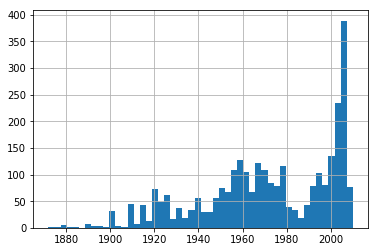

In [60]:
data_full.YearBuilt.hist(bins = 50)

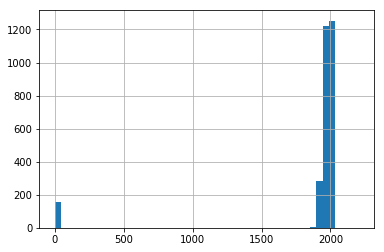

In [61]:
data_full.GarageYrBlt.hist(bins = 50)

In [62]:
data_full[data_full.GarageYrBlt > 2020]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
2592,1564,0,0,NaN,2,1Fam,TA,Av,583.0,0.0,GLQ,Unf,0.0,0.0,Gd,963.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,Gd,1,PConc,2,Typ,502.0,2.0,TA,RFn,TA,Attchd,2207.0,1564,0,GasA,Ex,1Story,2593,1,Ex,HLS,Gtl,8298,Inside,68.0,IR1,0,20,RL,0.0,None,NaN,0,9,Timber,0,5,8,Y,0,NaN,CompShg,Hip,Partial,NaN,New,0,Pave,6,1546.0,AllPub,132,2006,2007,2007


In [63]:
data_full[['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold' ]][data_full.GarageYrBlt > 2020]

,GarageYrBlt,YearBuilt,YearRemodAdd,YrSold
2592,2207.0,2006,2007,2007


## The above house mentions that the Garage was built in 2207. This is a typo and the person typing this likely wanted to type 2007. Looking at the above columns side by side side, YearRemodAdd and YrSold have 2007, so Garage year built will be fixed to 2007.

In [64]:
data_full.GarageYrBlt.loc[2592] = 2007

C:\Users\maniq\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


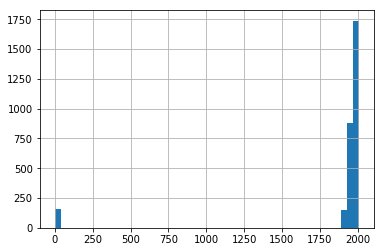

In [65]:
data_full.GarageYrBlt.hist(bins = 50)

In [66]:
data_full.isnull().sum()[data_full.isnull().sum()>0].sort_values(ascending = True)

LotFrontage     486
FireplaceQu    1420
SalePrice      1459
Fence          2348
Alley          2721
MiscFeature    2814
PoolQC         2909
dtype: int64

# There are 1,420 houses that have 0 Fireplaces, so these couldn’t receive a rating for Fire Place Quality. Hence, 1,420 missing values for Fire Place Quality are filled with "NA".

In [67]:
data_full.Fireplaces[data_full.Fireplaces == 0].count()

1420

In [68]:
data_full.FireplaceQu.fillna('NA', inplace = True)

In [69]:
data_full.PoolArea[data_full.PoolArea == 0].count()

2906

In [70]:
data_full[(data_full.PoolArea > 300)&(data_full.PoolArea < 600)]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
197,1360,1360,0,NaN,4,1Fam,TA,No,1036.0,184.0,GLQ,LwQ,1.0,1.0,TA,140.0,Y,Artery,Norm,SBrkr,552,Gd,Gd,Stucco,Stucco,GdPrv,Ex,1,PConc,2,Typ,795.0,2.0,TA,Unf,TA,Detchd,1918.0,3112,0,GasA,Gd,2Story,198,1,Gd,Lvl,Gtl,25419,Corner,174.0,Reg,392,75,RL,0.0,None,NaN,0,3,NAmes,16,4,8,Y,512,Ex,CompShg,Gable,Abnorml,235000.0,WD,0,Pave,8,1360.0,AllPub,0,1918,1990,2006
1170,1118,0,0,NaN,3,1Fam,TA,Av,522.0,0.0,ALQ,Unf,1.0,0.0,TA,574.0,Y,Norm,Norm,SBrkr,0,TA,TA,Plywood,Plywood,GdPrv,Po,1,CBlock,1,Typ,358.0,1.0,TA,Fin,TA,Attchd,1977.0,1118,0,GasA,TA,SLvl,1171,1,TA,Lvl,Gtl,9880,Inside,76.0,Reg,0,80,RL,0.0,None,NaN,0,7,Mitchel,0,6,6,Y,576,Gd,CompShg,Gable,Normal,171000.0,WD,0,Pave,6,1096.0,AllPub,203,1977,1977,2008
1182,2411,2065,0,NaN,4,1Fam,TA,Av,2096.0,0.0,GLQ,Unf,1.0,0.0,Ex,300.0,Y,Norm,Norm,SBrkr,0,TA,Gd,Wd Sdng,ImStucc,MnPrv,TA,2,PConc,3,Typ,813.0,3.0,TA,Fin,TA,Attchd,1996.0,4476,1,GasA,Ex,2Story,1183,1,Ex,Lvl,Gtl,15623,Corner,160.0,IR1,0,60,RL,0.0,None,NaN,0,7,NoRidge,78,5,10,Y,555,Ex,CompShg,Hip,Abnorml,745000.0,WD,0,Pave,10,2396.0,AllPub,171,1996,1996,2007
1298,4692,950,0,NaN,3,1Fam,TA,Gd,5644.0,0.0,GLQ,Unf,2.0,0.0,Ex,466.0,Y,Feedr,Norm,SBrkr,0,TA,Ex,Stucco,Stucco,NaN,Gd,3,PConc,2,Typ,1418.0,2.0,TA,Fin,TA,Attchd,2008.0,5642,1,GasA,Ex,2Story,1299,1,Ex,Bnk,Gtl,63887,Corner,313.0,IR3,0,60,RL,796.0,Stone,NaN,0,1,Edwards,292,5,10,Y,480,Gd,ClyTile,Hip,Partial,160000.0,New,0,Pave,12,6110.0,AllPub,214,2008,2008,2008
1386,1392,1392,0,NaN,5,1Fam,TA,No,790.0,469.0,BLQ,LwQ,1.0,0.0,Gd,133.0,Y,RRAn,Norm,SBrkr,0,TA,TA,Plywood,Plywood,MnPrv,TA,2,CBlock,3,Typ,564.0,2.0,TA,RFn,TA,Attchd,1978.0,2784,1,GasA,TA,2Story,1387,1,Gd,Lvl,Gtl,16692,Inside,80.0,IR1,0,60,RL,184.0,BrkFace,TenC,2000,7,NWAmes,112,5,7,Y,519,Fa,CompShg,Gable,Normal,250000.0,WD,440,Pave,12,1392.0,AllPub,0,1978,1978,2006
2420,1647,0,0,NaN,3,1Fam,TA,No,595.0,354.0,BLQ,Rec,1.0,0.0,TA,156.0,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,GdPrv,Fa,1,CBlock,1,Min1,280.0,1.0,TA,Fin,TA,Attchd,1953.0,1647,0,GasA,Gd,1Story,2421,1,TA,Lvl,Gtl,9532,Inside,75.0,Reg,0,20,RL,0.0,None,NaN,0,2,NAmes,0,6,4,Y,368,NaN,CompShg,Gable,Normal,NaN,WD,0,Pave,6,1105.0,AllPub,225,1953,1953,2007
2503,1105,717,0,NaN,4,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,1105.0,Y,Feedr,Norm,SBrkr,1012,TA,TA,Wd Sdng,Wd Sdng,NaN,Po,1,CBlock,2,Min2,515.0,2.0,TA,Unf,TA,Attchd,1984.0,1822,0,GasA,Ex,1.5Fin,2504,1,Gd,Lvl,Gtl,23920,Inside,104.0,Reg,0,50,RL,0.0,None,NaN,0,4,SawyerW,195,5,6,P,444,NaN,CompShg,Gable,Normal,NaN,WD,0,Pave,7,1105.0,AllPub,0,1984,1984,2007
2599,2034,0,0,NaN,2,1Fam,NA,NA,0.0,0.0,NA,NA,0.0,0.0,NA,0.0,Y,Artery,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,GdPrv,NA,0,CBlock,1,Min1,1041.0,4.0,TA,RFn,TA,2Types,1953.0,2034,0,GasA,Ex,1Story,2600,1,TA,Lvl,Gtl,43500,Inside,200.0,Reg,0,20,RL,0.0,None,NaN,0,6,Mitchel,266,5,3,N,561,NaN,CompShg,Gable,Normal,NaN,WD,0,Pave,9,0.0,AllPub,483,1953,1953,2007


## There are 2,906 houses that have Pool Area of 0, which means these houses do not have a pool. So 2,909 missing values for Pool Quality are filled with "NA". This is off by 3 numbers, which is 0.1%, but that's ok.

In [71]:
data_full.PoolQC.fillna('NA', inplace = True)

In [72]:
data_full.MiscFeature.unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [73]:
data_full.groupby('MiscFeature')['MiscVal'].agg(('max', 'count'))

,max,count
MiscFeature,,
Gar2,15500,5
Othr,6500,4
Shed,4500,95
TenC,2000,1


In [74]:
data_full[data_full.MiscVal >=15500]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
346,958,0,0,NaN,2,1Fam,TA,Mn,498.0,0.0,BLQ,Unf,0.0,0.0,TA,460.0,Y,Norm,Norm,SBrkr,0,Gd,TA,MetalSd,MetalSd,NaN,NA,0,CBlock,1,Typ,301.0,1.0,TA,RFn,TA,Attchd,1960.0,958,0,GasA,TA,1Story,347,1,TA,Lvl,Gtl,12772,CulDSac,NaN,IR1,0,20,RL,0.0,None,Gar2,15500,4,NAmes,0,8,6,Y,0,NA,CompShg,Hip,Normal,151500.0,WD,0,Pave,5,958.0,AllPub,0,1960,1998,2007
2549,5095,0,0,NaN,2,1Fam,TA,Gd,4010.0,0.0,GLQ,Unf,1.0,1.0,Ex,1085.0,Y,Norm,Norm,SBrkr,0,TA,Ex,CemntBd,CmentBd,NaN,Gd,2,PConc,2,Typ,1154.0,3.0,TA,Fin,TA,Attchd,2008.0,5095,1,GasA,Ex,1Story,2550,1,Ex,Bnk,Gtl,39290,Inside,128.0,IR1,0,20,RL,1224.0,Stone,NaN,17000,10,Edwards,484,5,10,Y,0,NA,CompShg,Hip,Partial,NaN,New,0,Pave,15,5095.0,AllPub,546,2008,2009,2007


In [75]:
#data_full.MiscFeature.loc[2549] = 'Elev'

In [76]:
data_full.MiscFeature.iloc[2549] = 'Elev'

C:\Users\maniq\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


## There are 2,816 MiscVal that have a value of 0. And MiscFeature is missing 2,813 almost the same number of values. If something has 0 MiscVal, which is value of miscellaneous item or feature, it is probably because these houses don’t  have a  MiscFeature, so the missing values are filled with "NA".

In [77]:
data_full.MiscVal[data_full.MiscVal <=0].count()

2816

In [78]:
data_full.MiscFeature.isnull().sum()

2813

In [79]:
data_full.MiscFeature.fillna('NA', inplace = True)

# Missing values for Fence, Alley, and LotFrontage are filled with NA and 0. Because it's likely that the houses that are missing these values, don't have fence, alley, and lot frontage. 

In [80]:
data_full.Fence.fillna('NA', inplace = True)

In [81]:
data_full.Alley.fillna('NA', inplace = True)

In [82]:
data_full.LotFrontage.fillna(0, inplace = True)

In [83]:
data_full.isnull().sum()[data_full.isnull().sum()>0].sort_values(ascending = True)

SalePrice    1459
dtype: int64

# All missing values have been filled. Some of the objects can be turned into categories, so there can be an ordinal or ranking system. But for this project no categories are created because dummies will be created later. 

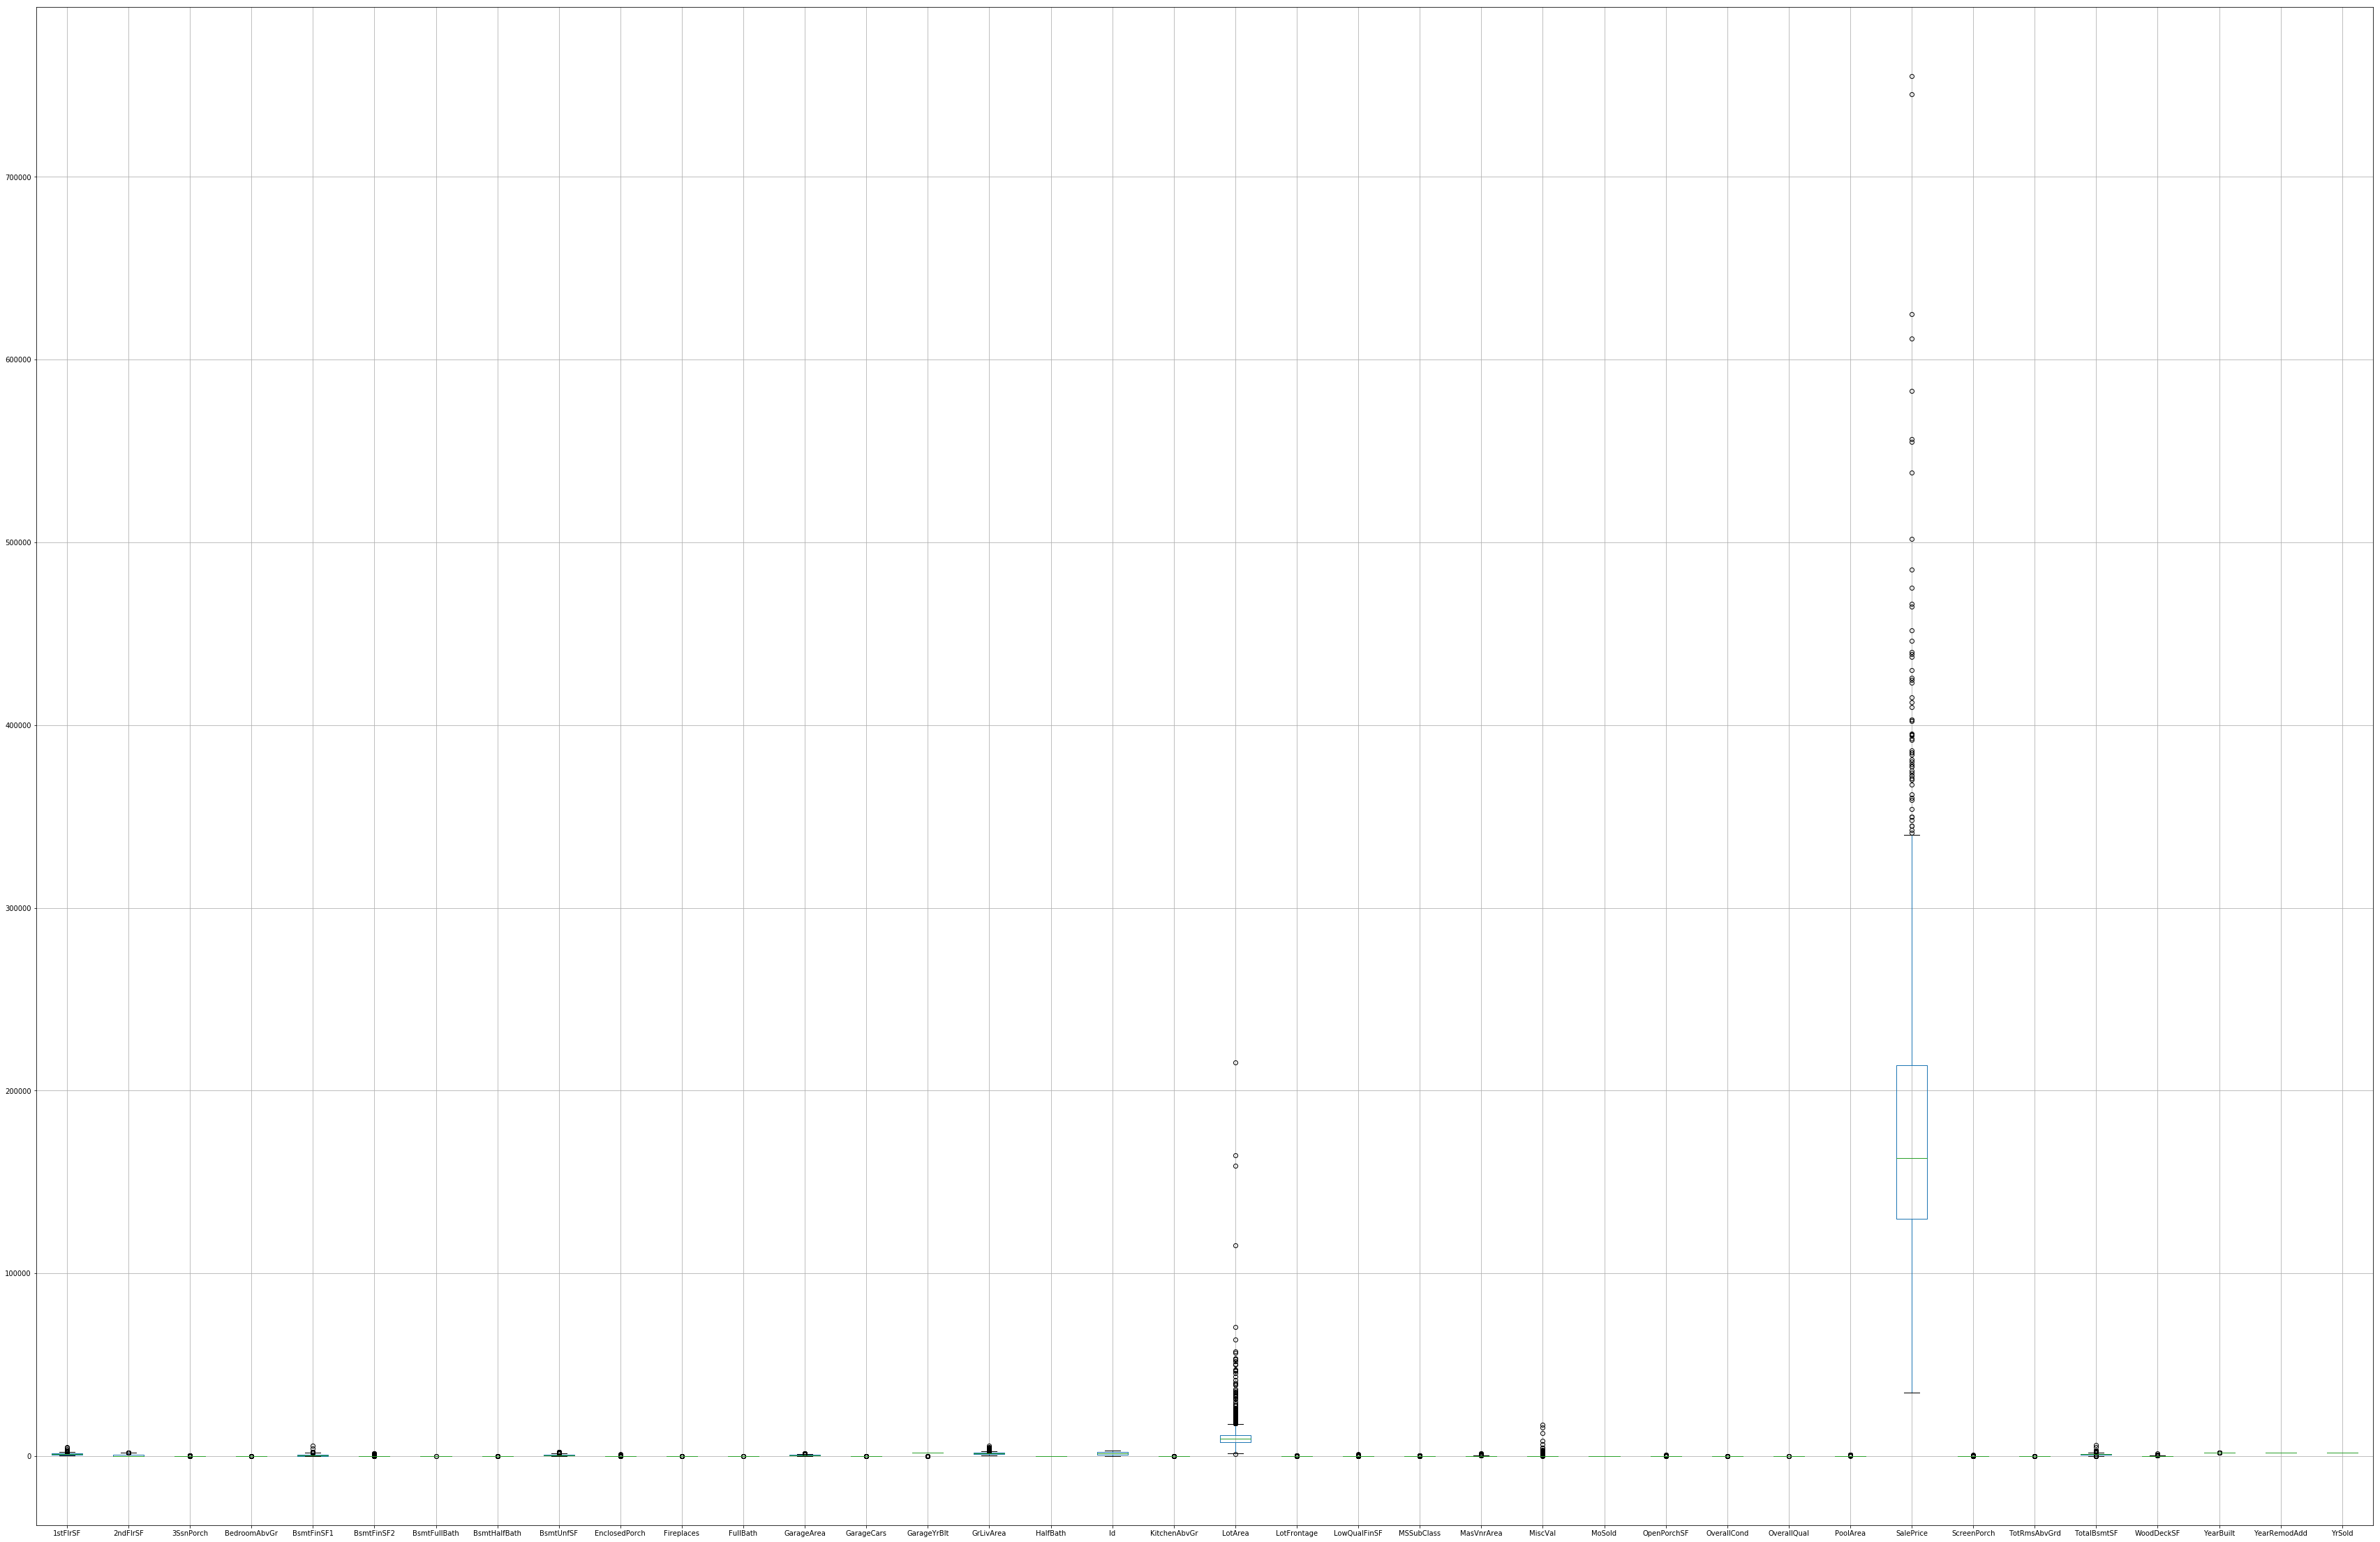

In [84]:
plt.figure(figsize=(60,40))
data_full.boxplot()

In [85]:
data_full.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NA,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NA,NA,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,NA,0,2,CollgCr,61,5,7,Y,0,NA,CompShg,Gable,Normal,208500.0,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NA,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NA,TA,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,NA,0,5,Veenker,0,8,6,Y,0,NA,CompShg,Gable,Normal,181500.0,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NA,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NA,TA,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,NA,0,9,CollgCr,42,5,7,Y,0,NA,CompShg,Gable,Normal,223500.0,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NA,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NA,Gd,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,NA,0,2,Crawfor,35,5,7,Y,0,NA,CompShg,Gable,Abnorml,140000.0,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NA,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NA,TA,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,NA,0,12,NoRidge,84,5,8,Y,0,NA,CompShg,Gable,Normal,250000.0,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


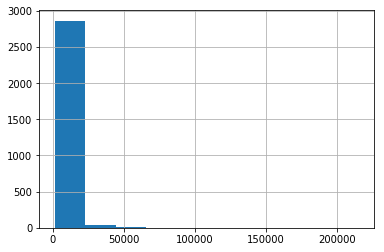

In [86]:
data_full.LotArea.hist()

In [87]:
data_full[data_full.LotArea > 70000]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
249,1444,700,0,NA,4,1Fam,TA,Gd,697.0,0.0,Rec,Unf,0.0,1.0,Gd,747.0,Y,Norm,Norm,SBrkr,0,TA,Gd,Wd Sdng,HdBoard,NA,TA,2,CBlock,2,Typ,389.0,2.0,TA,Fin,TA,Attchd,1958.0,2144,0,GasA,Gd,1.5Fin,250,1,Gd,Low,Sev,159000,CulDSac,0.0,IR2,0,50,RL,472.0,BrkCmn,Shed,500,6,ClearCr,98,7,6,Y,0,NA,CompShg,Gable,Normal,277000.0,WD,0,Pave,7,1444.0,AllPub,0,1958,2006,2007
313,2036,0,0,NA,3,1Fam,TA,Gd,1236.0,820.0,ALQ,Rec,2.0,0.0,Gd,80.0,Y,Norm,Norm,SBrkr,0,TA,TA,BrkFace,BrkFace,NA,Gd,2,CBlock,2,Typ,513.0,2.0,TA,RFn,TA,Attchd,1965.0,2036,0,GasW,TA,1Story,314,1,TA,Low,Sev,215245,Inside,150.0,IR3,0,20,RL,0.0,None,NA,0,6,Timber,0,5,7,Y,0,NA,CompShg,Hip,Normal,375000.0,WD,0,Pave,8,2136.0,AllPub,0,1965,1965,2009
335,1619,167,0,NA,3,2fmCon,TA,Gd,1249.0,147.0,ALQ,BLQ,2.0,0.0,TA,103.0,Y,Norm,Norm,SBrkr,0,TA,TA,Plywood,Plywood,NA,Gd,2,CBlock,2,Typ,529.0,2.0,TA,Fin,TA,Attchd,1965.0,1786,0,GasA,Ex,1.5Fin,336,1,TA,HLS,Sev,164660,Corner,0.0,IR1,0,190,RL,0.0,None,Shed,700,8,Timber,0,6,5,Y,0,NA,CompShg,Gable,Normal,228950.0,WD,0,Grvl,7,1499.0,AllPub,670,1965,1965,2008
451,1533,0,0,NA,2,1Fam,TA,Gd,655.0,0.0,ALQ,Unf,1.0,0.0,Gd,878.0,Y,Norm,Norm,SBrkr,0,TA,TA,Plywood,Plywood,NA,TA,2,CBlock,2,Typ,576.0,2.0,TA,Unf,TA,Attchd,1975.0,1533,0,GasA,TA,1Story,452,1,Gd,Low,Mod,70761,Inside,62.0,IR1,0,20,RL,0.0,None,NA,0,12,ClearCr,54,5,7,Y,0,NA,WdShngl,Gable,Normal,280000.0,WD,0,Pave,5,1533.0,AllPub,200,1975,1975,2006
706,1824,0,0,NA,2,1Fam,TA,Gd,1219.0,0.0,GLQ,Unf,1.0,0.0,Gd,424.0,Y,Norm,Norm,SBrkr,0,TA,TA,Plywood,Plywood,NA,TA,2,CBlock,2,Typ,739.0,2.0,TA,Unf,TA,Attchd,1971.0,1824,0,GasA,TA,1Story,707,1,Gd,Low,Sev,115149,CulDSac,0.0,IR2,0,20,RL,351.0,Stone,NA,0,6,ClearCr,48,5,7,Y,0,NA,CompShg,Gable,Normal,302000.0,WD,0,Pave,5,1643.0,AllPub,380,1971,2002,2007


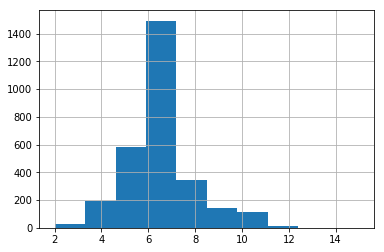

In [88]:
data_full.TotRmsAbvGrd.hist()

In [89]:
data_full[data_full.TotRmsAbvGrd >= 12].head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
185,1518,1518,0,NA,4,1Fam,TA,Mn,0.0,0.0,Unf,Unf,0.0,0.0,TA,1107.0,Y,Artery,Norm,SBrkr,0,Gd,Gd,Wd Sdng,Wd Sdng,GdPrv,TA,2,BrkTil,2,Typ,840.0,3.0,TA,Unf,Ex,Detchd,1993.0,3608,1,GasA,Ex,2.5Fin,186,1,Ex,Lvl,Gtl,22950,Inside,90.0,IR2,572,75,RM,0.0,None,NA,0,6,OldTown,260,9,10,Y,0,NA,WdShngl,Gable,Normal,475000.0,WD,410,Pave,12,1107.0,AllPub,0,1892,1993,2006
635,1440,1440,0,Pave,8,2fmCon,Fa,No,256.0,0.0,LwQ,Unf,0.0,0.0,TA,1184.0,Y,Feedr,Norm,FuseA,0,TA,Fa,VinylSd,VinylSd,NA,NA,0,CBlock,2,Typ,0.0,0.0,NA,NA,NA,NA,0.0,3395,0,GasA,Ex,2.5Fin,636,2,Fa,Bnk,Gtl,10896,Inside,60.0,Reg,515,190,RH,0.0,None,NA,0,3,SWISU,110,7,6,N,0,NA,CompShg,Hip,Abnorml,200000.0,WD,0,Pave,14,1440.0,AllPub,0,1914,1995,2007
769,1690,1589,0,NA,4,1Fam,TA,Gd,1416.0,0.0,ALQ,Unf,1.0,0.0,Gd,234.0,Y,Norm,Norm,SBrkr,0,TA,Ex,CemntBd,Wd Shng,NA,Gd,1,PConc,3,Mod,841.0,3.0,TA,Fin,TA,BuiltIn,2003.0,3279,1,GasA,Ex,2Story,770,1,Ex,HLS,Mod,53504,CulDSac,47.0,IR2,0,60,RL,603.0,BrkFace,NA,0,6,StoneBr,36,5,8,Y,0,NA,CompShg,Hip,Normal,538000.0,WD,210,Pave,12,1650.0,AllPub,503,2003,2003,2010
803,1734,1088,0,NA,4,1Fam,TA,Gd,0.0,0.0,Unf,Unf,0.0,0.0,Ex,1734.0,Y,Norm,Norm,SBrkr,0,TA,Ex,VinylSd,VinylSd,NA,Gd,1,PConc,3,Typ,1020.0,3.0,TA,RFn,TA,BuiltIn,2009.0,2822,1,GasA,Ex,2Story,804,1,Ex,Lvl,Gtl,13891,Inside,107.0,Reg,0,60,RL,424.0,Stone,NA,0,1,NridgHt,170,5,9,Y,0,NA,CompShg,Hip,Partial,582933.0,New,192,Pave,12,1734.0,AllPub,52,2008,2009,2009
897,1120,1120,0,NA,6,Duplex,NA,NA,0.0,0.0,NA,NA,0.0,0.0,NA,0.0,Y,Feedr,Norm,SBrkr,0,TA,TA,Plywood,Plywood,NA,NA,0,Slab,2,Typ,528.0,2.0,TA,Unf,TA,Detchd,1979.0,2240,0,GasA,TA,2Story,898,2,TA,Lvl,Gtl,7018,Inside,64.0,Reg,0,90,RL,0.0,None,NA,0,6,SawyerW,0,5,5,Y,0,NA,CompShg,Gable,Alloca,142953.0,WD,0,Pave,12,0.0,AllPub,154,1979,1979,2009


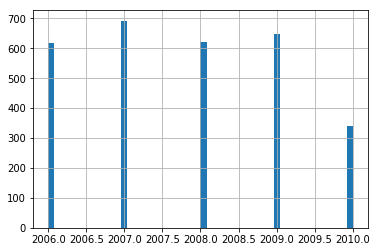

In [90]:
data_full.YrSold.hist(bins = 50)

In [91]:
data_full.SalePrice.min()

34900.0

In [92]:
data_full[data_full.SalePrice <50000]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
30,649,668,0,Pave,3,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,649.0,N,Feedr,Norm,SBrkr,172,Fa,TA,BrkFace,BrkFace,MnPrv,NA,0,BrkTil,1,Typ,250.0,1.0,Fa,Unf,TA,Detchd,1920.0,1317,0,GasA,TA,2Story,31,1,TA,Lvl,Gtl,8500,Inside,50.0,Reg,0,70,C (all),0.0,None,NA,0,7,IDOTRR,54,4,4,N,0,NA,CompShg,Gambrel,Normal,40000.0,WD,0,Pave,6,649.0,AllPub,0,1920,1950,2008
495,720,0,0,NA,2,1Fam,TA,No,495.0,0.0,Rec,Unf,0.0,0.0,TA,225.0,N,Norm,Norm,FuseA,115,TA,TA,Wd Sdng,Wd Sdng,GdWo,NA,0,CBlock,1,Typ,0.0,0.0,NA,NA,NA,NA,0.0,720,0,GasA,TA,1Story,496,1,TA,Lvl,Gtl,7879,Inside,60.0,Reg,0,30,C (all),0.0,None,NA,0,11,IDOTRR,523,5,4,N,0,NA,CompShg,Gable,Abnorml,34900.0,WD,0,Pave,4,720.0,AllPub,0,1920,1950,2009
533,334,0,0,NA,1,1Fam,NA,NA,0.0,0.0,NA,NA,0.0,0.0,NA,0.0,N,Norm,Norm,FuseF,0,Fa,Fa,VinylSd,VinylSd,NA,NA,0,Slab,1,Typ,0.0,0.0,NA,NA,NA,NA,0.0,334,0,GasA,Fa,1Story,534,1,Fa,Low,Mod,5000,Inside,50.0,Reg,0,20,RL,0.0,None,NA,0,1,BrkSide,0,3,1,N,0,NA,CompShg,Gable,Normal,39300.0,WD,0,Pave,2,0.0,AllPub,0,1946,1950,2007
916,480,0,0,NA,1,1Fam,TA,Av,50.0,0.0,BLQ,Unf,1.0,0.0,TA,430.0,N,Norm,Norm,FuseA,0,TA,TA,AsbShng,AsbShng,NA,NA,0,CBlock,0,Typ,308.0,1.0,TA,Unf,TA,Detchd,1958.0,480,0,GasA,TA,1Story,917,1,TA,Lvl,Gtl,9000,Inside,50.0,Reg,0,20,C (all),0.0,None,NA,0,10,IDOTRR,0,3,2,Y,0,NA,CompShg,Gable,Abnorml,35311.0,WD,0,Pave,4,480.0,AllPub,0,1949,1950,2006
968,600,368,0,NA,2,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,600.0,N,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,GdWo,NA,0,BrkTil,1,Typ,0.0,0.0,NA,NA,NA,NA,0.0,968,0,Grav,Fa,1.5Fin,969,1,TA,Lvl,Gtl,5925,Inside,50.0,Reg,0,50,RM,0.0,None,NA,0,5,OldTown,0,6,3,Y,0,NA,CompShg,Gable,Abnorml,37900.0,WD,0,Pave,6,600.0,AllPub,0,1910,1950,2009


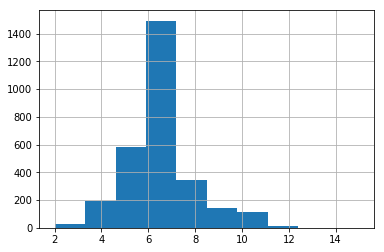

In [93]:
data_full.TotRmsAbvGrd.hist()

In [94]:
data_full.SalePrice[data_full.TotRmsAbvGrd >= 9].max()

755000.0

In [95]:
data_full[data_full.SalePrice >=300000].head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
6,1694,0,0,NA,3,1Fam,TA,Av,1369.0,0.0,GLQ,Unf,1.0,0.0,Ex,317.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NA,Gd,1,PConc,2,Typ,636.0,2.0,TA,RFn,TA,Attchd,2004.0,1694,0,GasA,Ex,1Story,7,1,Gd,Lvl,Gtl,10084,Inside,75.0,Reg,0,20,RL,186.0,Stone,NA,0,8,Somerst,57,5,8,Y,0,NA,CompShg,Gable,Normal,307000.0,WD,0,Pave,7,1686.0,AllPub,255,2004,2005,2007
11,1182,1142,0,NA,4,1Fam,TA,No,998.0,0.0,GLQ,Unf,1.0,0.0,Ex,177.0,Y,Norm,Norm,SBrkr,0,TA,Ex,WdShing,Wd Shng,NA,Gd,2,PConc,3,Typ,736.0,3.0,TA,Fin,TA,BuiltIn,2005.0,2324,0,GasA,Ex,2Story,12,1,Ex,Lvl,Gtl,11924,Inside,85.0,IR1,0,60,RL,286.0,Stone,NA,0,7,NridgHt,21,5,9,Y,0,NA,CompShg,Hip,Partial,345000.0,New,0,Pave,11,1175.0,AllPub,147,2005,2006,2006
20,1158,1218,0,NA,4,1Fam,TA,Av,0.0,0.0,Unf,Unf,0.0,0.0,Ex,1158.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NA,Gd,1,PConc,3,Typ,853.0,3.0,TA,RFn,TA,BuiltIn,2005.0,2376,1,GasA,Ex,2Story,21,1,Gd,Lvl,Gtl,14215,Corner,101.0,IR1,0,60,RL,380.0,BrkFace,NA,0,11,NridgHt,154,5,8,Y,0,NA,CompShg,Gable,Partial,325300.0,New,0,Pave,9,1158.0,AllPub,240,2005,2006,2006
27,1704,0,0,NA,3,1Fam,TA,No,1218.0,0.0,GLQ,Unf,1.0,0.0,Ex,486.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NA,Gd,1,PConc,2,Typ,772.0,3.0,TA,RFn,TA,Attchd,2008.0,1704,0,GasA,Ex,1Story,28,1,Gd,Lvl,Gtl,11478,Inside,98.0,Reg,0,20,RL,200.0,Stone,NA,0,5,NridgHt,50,5,8,Y,0,NA,CompShg,Gable,Normal,306000.0,WD,0,Pave,7,1704.0,AllPub,0,2007,2008,2010
35,1132,1320,0,NA,4,1Fam,TA,Av,0.0,0.0,Unf,Unf,0.0,0.0,Ex,1117.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NA,Gd,1,PConc,3,Typ,691.0,3.0,TA,Fin,TA,BuiltIn,2004.0,2452,1,GasA,Ex,2Story,36,1,Gd,Lvl,Gtl,13418,Inside,108.0,Reg,0,60,RL,132.0,Stone,NA,0,9,NridgHt,32,5,8,Y,0,NA,CompShg,Gable,Normal,309000.0,WD,0,Pave,9,1117.0,AllPub,113,2004,2005,2006


In [96]:
data_full.SalePrice[data_full.GarageCars == 2].min()

55993.0

In [97]:
data_full[data_full.SalePrice <=50000]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
30,649,668,0,Pave,3,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,649.0,N,Feedr,Norm,SBrkr,172,Fa,TA,BrkFace,BrkFace,MnPrv,NA,0,BrkTil,1,Typ,250.0,1.0,Fa,Unf,TA,Detchd,1920.0,1317,0,GasA,TA,2Story,31,1,TA,Lvl,Gtl,8500,Inside,50.0,Reg,0,70,C (all),0.0,None,NA,0,7,IDOTRR,54,4,4,N,0,NA,CompShg,Gambrel,Normal,40000.0,WD,0,Pave,6,649.0,AllPub,0,1920,1950,2008
495,720,0,0,NA,2,1Fam,TA,No,495.0,0.0,Rec,Unf,0.0,0.0,TA,225.0,N,Norm,Norm,FuseA,115,TA,TA,Wd Sdng,Wd Sdng,GdWo,NA,0,CBlock,1,Typ,0.0,0.0,NA,NA,NA,NA,0.0,720,0,GasA,TA,1Story,496,1,TA,Lvl,Gtl,7879,Inside,60.0,Reg,0,30,C (all),0.0,None,NA,0,11,IDOTRR,523,5,4,N,0,NA,CompShg,Gable,Abnorml,34900.0,WD,0,Pave,4,720.0,AllPub,0,1920,1950,2009
533,334,0,0,NA,1,1Fam,NA,NA,0.0,0.0,NA,NA,0.0,0.0,NA,0.0,N,Norm,Norm,FuseF,0,Fa,Fa,VinylSd,VinylSd,NA,NA,0,Slab,1,Typ,0.0,0.0,NA,NA,NA,NA,0.0,334,0,GasA,Fa,1Story,534,1,Fa,Low,Mod,5000,Inside,50.0,Reg,0,20,RL,0.0,None,NA,0,1,BrkSide,0,3,1,N,0,NA,CompShg,Gable,Normal,39300.0,WD,0,Pave,2,0.0,AllPub,0,1946,1950,2007
916,480,0,0,NA,1,1Fam,TA,Av,50.0,0.0,BLQ,Unf,1.0,0.0,TA,430.0,N,Norm,Norm,FuseA,0,TA,TA,AsbShng,AsbShng,NA,NA,0,CBlock,0,Typ,308.0,1.0,TA,Unf,TA,Detchd,1958.0,480,0,GasA,TA,1Story,917,1,TA,Lvl,Gtl,9000,Inside,50.0,Reg,0,20,C (all),0.0,None,NA,0,10,IDOTRR,0,3,2,Y,0,NA,CompShg,Gable,Abnorml,35311.0,WD,0,Pave,4,480.0,AllPub,0,1949,1950,2006
968,600,368,0,NA,2,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,600.0,N,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,GdWo,NA,0,BrkTil,1,Typ,0.0,0.0,NA,NA,NA,NA,0.0,968,0,Grav,Fa,1.5Fin,969,1,TA,Lvl,Gtl,5925,Inside,50.0,Reg,0,50,RM,0.0,None,NA,0,5,OldTown,0,6,3,Y,0,NA,CompShg,Gable,Abnorml,37900.0,WD,0,Pave,6,600.0,AllPub,0,1910,1950,2009


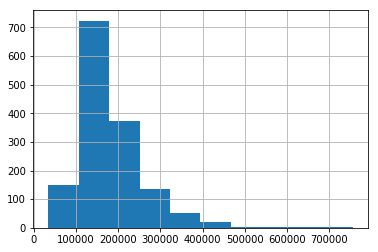

In [98]:
data_full.SalePrice.hist()

## 5. Dummy values are created so object variables can get a number 0 or 1. 
## Another way to handle object variables would be to assign them numerical values manually, but creating dummies is more efficient when there are a lot of different variables and unique values. 

In [99]:
after_dummies = pd.get_dummies(data_full, drop_first = True)
after_dummies.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_NA,Alley_Pave,...,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_NA,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,0,2,548.0,2.0,2003.0,1710,1,1,1,8450,65.0,0,60,196.0,0,2,61,5,7,0,208500.0,0,8,856.0,0,2003,2003,2008,1,0,...,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,1,2,460.0,2.0,1976.0,1262,0,2,1,9600,80.0,0,20,0.0,0,5,0,8,6,0,181500.0,0,6,1262.0,298,1976,1976,2007,1,0,...,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,1,2,608.0,2.0,2001.0,1786,1,3,1,11250,68.0,0,60,162.0,0,9,42,5,7,0,223500.0,0,6,920.0,0,2001,2002,2008,1,0,...,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,1,1,642.0,3.0,1998.0,1717,0,4,1,9550,60.0,0,70,0.0,0,2,35,5,7,0,140000.0,0,7,756.0,0,1915,1970,2006,1,0,...,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,1,2,836.0,3.0,2000.0,2198,1,5,1,14260,84.0,0,60,350.0,0,12,84,5,8,0,250000.0,0,9,1145.0,192,2000,2000,2008,1,0,...,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0


# 6. Data is Split because the data at the bottom have missing values for house prices and those are the values that will be predicted once the model has been trained on the values from the top half of the data.

In [100]:
after_dummies.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_NA,Alley_Pave,...,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_NA,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,0,2,548.0,2.0,2003.0,1710,1,1,1,8450,65.0,0,60,196.0,0,2,61,5,7,0,208500.0,0,8,856.0,0,2003,2003,2008,1,0,...,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,1,2,460.0,2.0,1976.0,1262,0,2,1,9600,80.0,0,20,0.0,0,5,0,8,6,0,181500.0,0,6,1262.0,298,1976,1976,2007,1,0,...,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,1,2,608.0,2.0,2001.0,1786,1,3,1,11250,68.0,0,60,162.0,0,9,42,5,7,0,223500.0,0,6,920.0,0,2001,2002,2008,1,0,...,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,1,1,642.0,3.0,1998.0,1717,0,4,1,9550,60.0,0,70,0.0,0,2,35,5,7,0,140000.0,0,7,756.0,0,1915,1970,2006,1,0,...,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,1,2,836.0,3.0,2000.0,2198,1,5,1,14260,84.0,0,60,350.0,0,12,84,5,8,0,250000.0,0,9,1145.0,192,2000,2000,2008,1,0,...,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0


In [101]:
data_train.shape

(1460, 81)

In [102]:
data_test.shape

(1459, 80)

In [103]:
after_dummies.SalePrice[:1460].head()

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

In [104]:
after_dummies.SalePrice[1460:].head()

1460   NaN
1461   NaN
1462   NaN
1463   NaN
1464   NaN
Name: SalePrice, dtype: float64

In [105]:
edit_train = after_dummies[:1460]
edit_test = after_dummies[1460:]

# 7. Create a model (Assign values to x and y) - All the features are assigned to x, except SalePrice which is target variable at Y. And Id is dropped because an Id# is just a unique number.

In [106]:
y = edit_train['SalePrice']

del edit_train['Id']
del edit_train['SalePrice']
x = edit_train

# 7.2 Feature Scaling – All of the x features are scaled to have a weight between 0 and 1. However, there was no difference in performance, results, and runtime. A model with and without feature scaling performed the same and took the same amount of time to train.

In [107]:
from sklearn.preprocessing import minmax_scale
rescaled_x = minmax_scale(x, feature_range=(0,1), axis=0, copy=True)

# 7.3 Import Algorithms

In [108]:
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor

# 8. Train Test Split - 20% of the data is reserved for testing and 80% is used to train the model.

In [109]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(rescaled_x , y, test_size = 0.20, random_state = 0)

# 9. Import Alogrithms

In [110]:
from sklearn.ensemble import ExtraTreesRegressor   
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import AdaBoostRegressor 
from sklearn.ensemble import BaggingRegressor 
from mlxtend.regressor import StackingRegressor

In [111]:
et = ExtraTreesRegressor(random_state = 0, n_estimators = 100, warm_start = True)
rfr = RandomForestRegressor(random_state = 0, n_estimators = 100, warm_start = True)
g = GradientBoostingRegressor(random_state = 0, n_estimators = 100, warm_start = True)
dt = DecisionTreeRegressor(random_state = 0)

ada = AdaBoostRegressor(random_state = 0)
bag = BaggingRegressor(random_state = 0, warm_start = True)

adaet = AdaBoostRegressor(random_state = 0, base_estimator = et)
adarfr = AdaBoostRegressor(random_state = 0, base_estimator = rfr)
adag = AdaBoostRegressor(random_state = 0, base_estimator = g)

baget = BaggingRegressor(random_state = 0, base_estimator = et)
bagrfr = BaggingRegressor(random_state = 0, base_estimator = rfr)
bagg = BaggingRegressor(random_state = 0,  base_estimator = g)


sr = StackingRegressor(regressors = [adaet, adarfr, baget, bagrfr, bagg], meta_regressor =adag )

# 10. Fit the data

In [112]:
%%time
etr = et.fit(x_train, y_train)  
rfrr = rfr.fit(x_train, y_train)
gr = g.fit(x_train, y_train)
dtr = dt.fit(x_train, y_train)

adar = ada.fit(x_train, y_train)
bagr = bag.fit(x_train, y_train)

adaetr = adaet.fit(x_train, y_train)
adarfrr = adarfr.fit(x_train, y_train)
adagr = adag.fit(x_train, y_train)

bagetr = baget.fit(x_train, y_train)
bagrfrr = bagrfr.fit(x_train, y_train)
baggr = bagg.fit(x_train, y_train)

srr = sr.fit(x_train, y_train)

Wall time: 5min 33s


# 11.1 Print Matrics

In [113]:
print("ExtraTree Regressor:", etr.score(x_train, y_train))           
print("Random Forest Regressor:", rfrr.score(x_train, y_train))
print("Gradient Boosting Regressor train score:", gr.score(x_train, y_train))
print("Decision Tree Regressor train score:", dtr.score(x_train, y_train))

print("\nAdaBoost Regressor:", adar.score(x_train, y_train))         
print("Bagging Regressor:", bagr.score(x_train, y_train))

print("\nAdaBoost Regressor with Extra Tree:", adaetr.score(x_train, y_train))         
print("AdaBoost Regressor with Random Forest:", adarfrr.score(x_train, y_train))         
print("AdaBoost Regressor with Gradient Boosting:", adagr.score(x_train, y_train))         

print("\nBagging Regressor with Extra Tree:", bagetr.score(x_train, y_train))
print("Bagging Regressor with Random Forest:", bagrfrr.score(x_train, y_train))
print("Bagging Regressor with Gradient Boosting:", baggr.score(x_train, y_train))


print("\nStacking Regressor train score:", srr.score(x_train, y_train))

ExtraTree Regressor: 1.0
Random Forest Regressor: 0.9792048949370725
Gradient Boosting Regressor train score: 0.9683182457713834
Decision Tree Regressor train score: 1.0

AdaBoost Regressor: 0.8762689830037002
Bagging Regressor: 0.9675968204875206

AdaBoost Regressor with Extra Tree: 0.9988404421915027
AdaBoost Regressor with Random Forest: 0.9957039404351817
AdaBoost Regressor with Gradient Boosting: 0.9784427294703638

Bagging Regressor with Extra Tree: 0.9760159747007434
Bagging Regressor with Random Forest: 0.9454550768337271
Bagging Regressor with Gradient Boosting: 0.9487229197727908

Stacking Regressor train score: 0.9993785991169332


In [114]:
print("ExtraTree Regressor:", etr.score(x_test, y_test))               
print("Random Forest Regressor:", rfrr.score(x_test, y_test))
print("Gradient Boosting Regressor test score:", gr.score(x_test, y_test))
print("Decision Tree Regressor test score:", dtr.score (x_test, y_test))

print("\nAdaBoost Regressor:", adar.score(x_test, y_test))              
print("Bagging Regressor:", bagr.score(x_test, y_test))

print("\nAdaBoost Regressor with Extra Tree:", adaetr.score(x_test, y_test))         
print("AdaBoost Regressor with Random Forest:", adarfrr.score(x_test, y_test))         
print("AdaBoost Regressor with Gradient Boosting:", adagr.score(x_test, y_test))         

print("\nBagging Regressor with Extra Tree:", bagetr.score(x_test, y_test))
print("Bagging Regressor with Random Forest:", bagrfrr.score(x_test, y_test))
print("Bagging Regressor with Gradient Boosting:", baggr.score(x_test, y_test))

print("\nStacking Regressor test score:", srr.score(x_test, y_test))

ExtraTree Regressor: 0.8521895759683165
Random Forest Regressor: 0.8221823669677105
Gradient Boosting Regressor test score: 0.8604521499130232
Decision Tree Regressor test score: 0.7870178082317507

AdaBoost Regressor: 0.7574393482631981
Bagging Regressor: 0.8445909881310238

AdaBoost Regressor with Extra Tree: 0.8607554187995863
AdaBoost Regressor with Random Forest: 0.8593111484517251
AdaBoost Regressor with Gradient Boosting: 0.8645923303344188

Bagging Regressor with Extra Tree: 0.8475280367330951
Bagging Regressor with Random Forest: 0.8234003030029219
Bagging Regressor with Gradient Boosting: 0.8484157542624424

Stacking Regressor test score: 0.8588684333231285


# 11.2 Root mean squared error

In [115]:
from sklearn.metrics import mean_squared_error

In [116]:
print("\nExtra Trees Regressor error: train", (mean_squared_error(y_train, etr.predict(x_train))**0.5))
print("Extra Trees Regressor error: test", (mean_squared_error(y_test, etr.predict(x_test))**0.5))
print("\nRandom Forest Regressor error: train", (mean_squared_error(y_train, rfr.predict(x_train))**0.5))
print("Random Forest Regressor error: test", (mean_squared_error(y_test, rfr.predict(x_test))**0.5))
print("\nGradient Boosting error: train", (mean_squared_error(y_train, gr.predict(x_train))**0.5))
print("Gradient Boosting error: test", (mean_squared_error(y_test, gr.predict(x_test))**0.5))

print("\nAda Boost regressor error: train", (mean_squared_error(y_train, adar.predict(x_train))**0.5))
print("Ada Boost regressor error: test", (mean_squared_error(y_test, adar.predict(x_test))**0.5))
print("\nBagging Regressor error: train", (mean_squared_error(y_train, bagr.predict(x_train))**0.5))
print("Bagging Regressor error: test", (mean_squared_error(y_test, bagr.predict(x_test))**0.5))


print("\nAda Boost regressor error w Extra Tree: train", (mean_squared_error(y_train, adaetr.predict(x_train))**0.5))
print("Ada Boost regressor error w Extra Tree: test", (mean_squared_error(y_test, adaetr.predict(x_test))**0.5))
print("\nAda Boost regressor error w Random Forest: train", (mean_squared_error(y_train, adarfrr.predict(x_train))**0.5))
print("Ada Boost regressor error w Random Forest: test", (mean_squared_error(y_test, adarfrr.predict(x_test))**0.5))
print("\nAda Boost regressor error w Gradient Boosting: train", (mean_squared_error(y_train, adagr.predict(x_train))**0.5))
print("Ada Boost regressor error w Gradient Boosting: test", (mean_squared_error(y_test, adagr.predict(x_test))**0.5))

print("\nBagging Regressor error w Extra Tree: train", (mean_squared_error(y_train, bagetr.predict(x_train))**0.5))
print("Bagging Regressor error w Extra Tree: test", (mean_squared_error(y_test, bagetr.predict(x_test))**0.5))
print("\nBagging Regressor error w Random Forest: train", (mean_squared_error(y_train, bagrfrr.predict(x_train))**0.5))
print("Bagging Regressor error w Random Forest: test", (mean_squared_error(y_test, bagrfrr.predict(x_test))**0.5))
print("\nBagging Regressor error w Gradient Boosting: train", (mean_squared_error(y_train, baggr.predict(x_train))**0.5))
print("Bagging Regressor error w Gradient Boosting: test", (mean_squared_error(y_test, baggr.predict(x_test))**0.5))

print("\nStacking Regressor: train", (mean_squared_error(y_train, srr.predict(x_train))**0.5))
print("Stacking Regressor: test", (mean_squared_error(y_test, srr.predict(x_test))**0.5))


Extra Trees Regressor error: train 0.0
Extra Trees Regressor error: test 31949.28186170314

Random Forest Regressor error: train 11315.239015213965
Random Forest Regressor error: test 35042.57260355232

Gradient Boosting error: train 13966.506344179063
Gradient Boosting error: test 31043.46171901459

Ada Boost regressor error: train 27600.850451199454
Ada Boost regressor error: test 40927.832437905556

Bagging Regressor error: train 14124.626940671162
Bagging Regressor error: test 32760.20938610128

Ada Boost regressor error w Extra Tree: train 2671.956448419686
Ada Boost regressor error w Extra Tree: test 31009.711157483696

Ada Boost regressor error w Random Forest: train 5143.021262308813
Ada Boost regressor error w Random Forest: test 31170.11550187707

Ada Boost regressor error w Gradient Boosting: train 11520.731591630092
Ada Boost regressor error w Gradient Boosting: test 30579.48741699017

Bagging Regressor error w Extra Tree: train 12151.90062945876
Bagging Regressor error w 

# 12. Cross Validation – The below cross-validation has 5 Folds, so the model was trained and tested 5 times and the predictions of the test are averaged out at the end to get more reliable test scores from the whole dataset. These models can predict the price of a house with an error of about 27,000 to 35,000. A model is good it has a low mean squared error because it makes the model more reliable in predicting the or getting close to the actual price.

In [117]:
from sklearn.model_selection import cross_val_score

In [118]:
%%time
print("ExtraTreeRegressor:",np.sqrt(-cross_val_score(et, rescaled_x, y, cv = 5, scoring = 'neg_mean_squared_error')).mean())
print("RandomForestRegressor:",np.sqrt(-cross_val_score(rfr, rescaled_x, y, cv = 5, scoring = 'neg_mean_squared_error')).mean())
print("Gradient Boosting Regressor:",np.sqrt(-cross_val_score(g, rescaled_x, y, cv = 5, scoring = 'neg_mean_squared_error')).mean())

print("\nAdaBoost:",np.sqrt(-cross_val_score(ada, rescaled_x, y, cv = 5, scoring = 'neg_mean_squared_error')).mean())
print("Bagging:",np.sqrt(-cross_val_score(bag, rescaled_x, y, cv = 5, scoring = 'neg_mean_squared_error')).mean())

print("\nAdaBoost w Extra Tree:",np.sqrt(-cross_val_score(adaet, rescaled_x, y, cv = 5, scoring = 'neg_mean_squared_error')).mean())
print("AdaBoost w Random Forest:",np.sqrt(-cross_val_score(adarfr, rescaled_x, y, cv = 5, scoring = 'neg_mean_squared_error')).mean())
print("AdaBoost w Gradient Boosting:",np.sqrt(-cross_val_score(adag, rescaled_x, y, cv = 5, scoring = 'neg_mean_squared_error')).mean())

print("\nBagging w Extra Tree:",np.sqrt(-cross_val_score(baget, rescaled_x, y, cv = 5, scoring = 'neg_mean_squared_error')).mean())
print("Bagging w Random Forest:",np.sqrt(-cross_val_score(bagrfr, rescaled_x, y, cv = 5, scoring = 'neg_mean_squared_error')).mean())
print("Bagging w Gradient Boosting:",np.sqrt(-cross_val_score(bagg, rescaled_x, y, cv = 5, scoring = 'neg_mean_squared_error')).mean())

print("\nStacking Regressor:",np.sqrt(-cross_val_score(sr, rescaled_x, y, cv = 5, scoring = 'neg_mean_squared_error')).mean())

ExtraTreeRegressor: 28783.98088532591
RandomForestRegressor: 30098.701944757242
Gradient Boosting Regressor: 26735.190356174164

AdaBoost: 34989.55164295278
Bagging: 31498.82216426697

AdaBoost w Extra Tree: 27894.46945797334
AdaBoost w Random Forest: 27839.852356419076
AdaBoost w Gradient Boosting: 26839.71789431406

Bagging w Extra Tree: 29253.37277510481
Bagging w Random Forest: 30120.695419732965
Bagging w Gradient Boosting: 26992.254970818285

Stacking Regressor: 27467.24186869144
Wall time: 27min 30s


In [119]:
#checkpoint

# 13. Feature Importances

In [146]:
feature_importances_etr = pd.DataFrame(etr.feature_importances_, index = x.columns,
                                     columns=["Importance"]).sort_values ("Importance", ascending = False)
feature_importances_etr.head(15)

,Importance
OverallQual,0.205751
ExterQual_TA,0.195581
GarageCars,0.149028
GrLivArea,0.057734
FullBath,0.025775
FireplaceQu_NA,0.024898
1stFlrSF,0.021047
BsmtFinSF1,0.020005
BsmtQual_Gd,0.017764
GarageArea,0.016222


In [127]:
feature_importances_rfrr = pd.DataFrame(rfrr.feature_importances_, index = x.columns,
                                     columns=["Importance"]).sort_values ("Importance", ascending = False)
feature_importances_rfrr

,Importance
OverallQual,5.775151e-01
GrLivArea,1.212892e-01
TotalBsmtSF,4.382122e-02
BsmtFinSF1,2.941346e-02
GarageArea,2.243555e-02
1stFlrSF,2.027381e-02
MasVnrArea,1.714196e-02
GarageCars,1.480668e-02
LotArea,1.401667e-02
YearBuilt,9.948994e-03


In [145]:
feature_importances_gr = pd.DataFrame(gr.feature_importances_, index = x.columns,
                                     columns=["Importance"]).sort_values ("Importance", ascending = False)
feature_importances_gr.head(15)

,Importance
GrLivArea,0.104699
OverallQual,0.090804
LotArea,0.052991
BsmtFinSF1,0.045831
TotalBsmtSF,0.044511
BsmtUnfSF,0.039590
OverallCond,0.034299
GarageArea,0.030603
YearBuilt,0.029057
YearRemodAdd,0.027705


In [144]:
feature_importances_dtr = pd.DataFrame(dtr.feature_importances_, index = x.columns,
                                     columns=["Importance"]).sort_values ("Importance", ascending = False)
feature_importances_dtr.head(15)

,Importance
OverallQual,0.646384
GrLivArea,0.104216
TotalBsmtSF,0.031088
BsmtFinSF1,0.030966
2ndFlrSF,0.025838
1stFlrSF,0.018664
YearRemodAdd,0.014401
LotArea,0.013431
YearBuilt,0.012139
LotFrontage,0.010799


# 13. The above model is used to predict the unknown house prices.

In [131]:
del edit_test['Id']
del edit_test['SalePrice']
x = edit_test

In [132]:
# rescaling
rescaled_x = minmax_scale(x, feature_range=(0,1), axis=0, copy=True)

In [133]:
gr.predict(rescaled_x)

array([136421.59428386, 177450.0255034 , 205536.27615895, ...,
       193137.7415083 , 142463.69559891, 256635.19640065])

In [134]:
data_full.SalePrice.loc[1460:] = gr.predict(x)

C:\Users\maniq\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [142]:
data_full.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NA,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NA,NA,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,NA,0,2,CollgCr,61,5,7,Y,0,NA,CompShg,Gable,Normal,208500.0,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NA,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NA,TA,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,NA,0,5,Veenker,0,8,6,Y,0,NA,CompShg,Gable,Normal,181500.0,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NA,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NA,TA,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,NA,0,9,CollgCr,42,5,7,Y,0,NA,CompShg,Gable,Normal,223500.0,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NA,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NA,Gd,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,NA,0,2,Crawfor,35,5,7,Y,0,NA,CompShg,Gable,Abnorml,140000.0,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NA,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NA,TA,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,NA,0,12,NoRidge,84,5,8,Y,0,NA,CompShg,Gable,Normal,250000.0,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [141]:
data_full[['Id', 'SalePrice']].loc[1460:].head()

,Id,SalePrice
1460,1461,374864.288623
1461,1462,408540.378095
1462,1463,377250.476354
1463,1464,431006.488160
1464,1465,451333.476722


In [137]:
results = data_full[['Id', 'SalePrice']].loc[1460:]

# 14. Results are saved on to a csv file.

In [138]:
results.to_csv('kaggle_submission_gb_0.86.csv', index = False)

## Concluding words: Overall Quality was the most important feature in three of the models. Ground living area is the second most important feature. Total basement square feet is the third most important feature in two of the models. Basement Finish square feet 1 is the fourth most important feature in 3 of the models. 

## It was interesting that feature scaling had little to no effect on performance or the runtime to train the model. Performance and runtime was the same with and without feature scaling. Another thing that stood out was that stacking regressor which had mostly all the algorithms stacked came relatively close to gradient boosting, but gradient boosting still did better. 

## There are 81 features, which is a lot of information, so narrowing down the features and building a model with 30 to 40 good features can make the model better and lower the error, but even more important would be to do feature engineering, some feature engineering was done, which is not shown in the project. But 1stFlrSF and 2ndFlrSF were added together to create a new column. Another column was created by adding Exterior1st and Exterior2nd. 4 old features were then dropped because new information had been extracted from them and new columns were used instead and having duplicate features in the model can make the model perform bad. Even with these new features, the model still performed the same as before. Parameter tuning would be another way to improve the model and doing feature engineering with some feature engineering can bring down the error more and improve the model. 

## Another area to explore would be to instead of predicting all 1459 unknown values, to predict 100 values at a times and then make the new prediction values part of the training set and then predict the next 100 values and make those predictions part of the original dataset to train the model again and predict the next 100 values and keep on doing this until all of the 1,459 values have been predicted. This will be a total of 14, 15 iterations, so at each iteration the model will learn something new and make the current model better for the next iteration.